<a href="https://colab.research.google.com/github/tdiffendal/USAT/blob/master/census-repsonses/census_responses_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2020 Census Response Rate Analysis

### Theresa Diffendal, USA Today data intern, 06/2020

#### 2020 response rates from: https://2020census.gov/en/response-rates.html
#### 2010 response rates from: https://api.census.gov/data/2010/dec/responserate/variables.html
#### Demographic information in 2014-2018 ACS 5-year-estimate from: https://data2.nhgis.org/main

## Read, Merge, Clean Data

### Initial Load and Merge

In [198]:
import pandas as pd
import numpy as np

In [199]:
#mount drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [200]:
# merge responses, crosswalk and region
# states paired with region as defined by census map at https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf

merged = pd.merge(pd.read_csv('https://www2.census.gov/programs-surveys/decennial/2020/data/2020map/2020/decennialrr2020.csv',
                         dtype={'CRRINT':np.float,
                                'CRRALL':np.float}),
                  pd.read_csv('https://www2.census.gov/programs-surveys/decennial/2020/data/2020map/2020/decennialrr2020_crosswalkfile.csv', encoding='ISO-8859-1'),
                  on='GEO_ID'
                  ).merge(pd.read_csv('https://raw.githubusercontent.com/tdiffendal/USAT/master/census-responses/data/state_region.csv'),
                          on='State')

# create column showing responses not from internet
merged['not_int'] = merged.CRRALL - merged.CRRINT
merged['not_int_pct'] = (merged.not_int) * 100 / merged.CRRALL

#reorder columns to move State, Geo_Name and Geo_Type to front; also going to drop some values
merged = merged[['GEO_ID','RESP_DATE','State','Geo_Name','Region', 
                 'Geo_Type','CRRINT','not_int','not_int_pct','CRRALL']].rename(
            columns={'CRRINT':'internet', 'CRRALL':'2020_rate'})

### States

In [201]:
# create df with response rate by state
states2020 = merged[merged['Geo_Type'] == 'State'].rename(
    columns={"internet": "state_internet",
             "not_int" : "state_not_int",
             'not_int_pct' : 'state_not_int_pct',
             "2020_rate" : "2020_state_rate"})

# read in csvs with 2010 response data for states
states2010 = pd.read_csv('https://raw.githubusercontent.com/tdiffendal/USAT/master/census-responses/data/states2010.csv',
                         dtype={'2010_rate':np.float,
                                '2000_rate':np.float})

# merge with 2020 states
states = pd.merge(states2020, states2010, on='State')
#only select columns we want
states = states[['GEO_ID', 'State', 'Region','2020_state_rate', 
                 '2010_rate', '2000_rate']].rename(
                     columns={'2000_rate':'2000_state_rate', 
                              '2010_rate':'2010_state_rate'})

#create column with difference in 2010 vs 2020 response rate
states['10_20_state_difference'] = (states['2020_state_rate'] - states['2010_state_rate']
    ) / states['2010_state_rate'] * 100

#print table sorted by 10-20 difference largest ---> smallest
states.sort_values(by=['10_20_state_difference'], ascending=True)

,GEO_ID,State,Region,2020_state_rate,2010_state_rate,2000_state_rate,10_20_state_difference
51,0400000US72,Puerto Rico,Puerto Rico,28.3,54.0,54.0,-47.592593
40,0400000US45,South Carolina,South,57.4,75.0,68.0,-23.466667
1,0400000US02,Alaska,West,49.8,64.0,67.0,-22.187500
33,0400000US37,North Carolina,South,59.3,76.0,69.0,-21.973684
9,0400000US12,Florida,South,60.1,74.0,71.0,-18.783784
19,0400000US23,Maine,Northeast,55.4,68.0,67.0,-18.529412
10,0400000US13,Georgia,South,58.9,72.0,72.0,-18.194444
43,0400000US48,Texas,South,58.2,71.0,70.0,-18.028169
31,0400000US35,New Mexico,West,53.4,65.0,68.0,-17.846154
42,0400000US47,Tennessee,South,62.5,76.0,72.0,-17.763158


### Census Tracts

In [202]:
# select just census tract geo types
tracts2020 = merged[merged['Geo_Type'].str.contains("Tract")].rename(
    columns={"2020_rate": "2020_tract_rate",'not_int':'tract_not_int',
             'not_int_pct':'tract_not_int_pct'}).sort_values(
                 by='2020_tract_rate', ascending=False)

# give tribal tracts state and regional values "Tribal Land"
tracts2020.loc[tracts2020['Geo_Type'].str.contains("Tribal")==True, 'Region'] = 'Tribal Land'
tracts2020.loc[tracts2020['Geo_Type'].str.contains("Tribal")==True, 'State'] = 'Tribal Land'

In [203]:
#tract rates compared to state averages
all20 = pd.merge(tracts2020, states, on=['State', 'Region'])

print(
    "Difference in records:", len(tracts2020) - len(all20),
    "\nNumber of tribal tracts:", len(tracts2020[tracts2020['Geo_Type'].str.contains(
        "Tribal")]),
    "\n\n", "merging tracts with states will drop tribal tracts",
    "\n(as they have no state), so those are examined separately below"
)

all20['2020_tract_st_diff'] = all20['2020_tract_rate'] - all20['2020_state_rate']
all20 = all20[['GEO_ID_x', 'State', 'Geo_Name', 'Geo_Type',
               'Region','2020_tract_rate', '2020_state_rate',
               '2010_state_rate', '10_20_state_difference','2020_tract_st_diff']
              ].rename(columns={'GEO_ID_x':'GEO_ID'}).sort_values(by=['2020_tract_st_diff'])

Difference in records: 426 
Number of tribal tracts: 426 

 merging tracts with states will drop tribal tracts 
(as they have no state), so those are examined separately below


In [204]:
# read in csvs with 2010 response data for tracts and states
tracts2010 = pd.read_csv('https://raw.githubusercontent.com/tdiffendal/USAT/master/census-responses/data/2010responserate.csv',
                         dtype={'FSRR2010':np.float}).rename(
                             columns={'FSRR2010':'2010_tract_rate'})

# merge with 2020 tracts
tracts = pd.merge(all20, tracts2010, on='GEO_ID')

#create column with difference in 2010 vs 2020 response rate
tracts['10_20_tract_difference'] = (tracts['2020_tract_rate'] - tracts['2010_tract_rate']) / tracts['2010_tract_rate'] * 100

#select only columns we want
tracts = tracts[['Geo_Name','county', 'State_y', 'Region', 'Geo_Type', 
                 '2020_tract_rate', '2010_tract_rate', '10_20_tract_difference', 
                 '2020_tract_st_diff', '2020_state_rate','2010_state_rate', 
                 '10_20_state_difference','GEO_ID']].rename(
            columns={'State_y':'State'}).sort_values(by='2010_tract_rate', ascending=False)

### Demographic Data

In [205]:
#load census demographic data, join

## internet access data
temp = pd.read_csv('/content/drive/Shared drives/Shared Items/census-responses/data/acs_internet_access/ACSDT5Y2018.B28002_data_with_overlays_2020-07-02T154751.csv',
                    usecols = [0,1,2,26],
                    names = ['GEO_ID', 'NAME','total_comp', 'no_int'],
                    dtype={'total_comp':np.int, 'no_int':np.int},
                    skiprows=2)

#create new column to get % without internet instead of whole number
temp['no_int_pct'] = temp.no_int * 100 / temp.total_comp 
temp = temp[['GEO_ID', 'NAME', 'no_int_pct']]

## some weirds NAs, so to turn all columns to float:
def valid_float(y):
  try:
    return float(y)
  except ValueError:
    return np.nan

## demographics data
frames = [pd.read_csv('/content/drive/Shared drives/Shared Items/census-responses/data/acs_demographics/ACSDP5Y2018.DP05_data_with_overlays_2020-07-02T144029.csv',
                    usecols = [0,1,2,70,148,152,156,176,208,228,232,284,304,342],
                    names = ['GEO_ID', 'NAME','total_population','median_age', 
                             'white_pct','black_pct','native_pct','asian_pct',
                             'pacific_pct','other_pct','two_pct','latino_pct',
                             'notLatino_pct','house_units'], 
                    skiprows= 1,
                    dtype={'total_population':np.int,'house_units':np.int},
                    converters={'median_age':valid_float,'white_pct':valid_float,
                                'black_pct':valid_float,'native_pct':valid_float,
                                'asian_pct':valid_float,'pacific_pct':valid_float,
                                'other_pct':valid_float,'two_pct':valid_float,
                                'latino_pct':valid_float,'notLatino_pct':valid_float,}),
           pd.read_csv('/content/drive/Shared drives/Shared Items/census-responses/data/acs_housing/ACSDP5Y2018.DP04_data_with_overlays_2020-07-02T161352.csv',
                    usecols = [0,1,8,12,184,188,300,354,568],
                    names = ['GEO_ID', 'NAME','occupied_pct','vacant_pct',
                             'owner_pct','renter_pct','no_telephone_pct',
                             'median_value','rent_more_35_pct'],
                    converters={'occupied_pct':valid_float,
                                'vacant_pct':valid_float,
                                'owner_pct':valid_float,
                                'renter_pct':valid_float,
                                'no_telephone_pct':valid_float,
                                'median_value':valid_float,
                                'rent_more_35_pct':valid_float},
                    skiprows=2),
          pd.read_csv('/content/drive/Shared drives/Shared Items/census-responses/data/acs_income/ACSST5Y2018.S1901_data_with_overlays_2020-07-02T160659.csv',
                    usecols = [0,1,90],
                    names = ['GEO_ID', 'NAME','median_income'],
                    converters={'median_income':valid_float},
                    skiprows=2),
          temp]

from functools import reduce
demo = reduce(lambda  left,right: pd.merge(left,right,on=['GEO_ID', 'NAME'],
                                           how='left'), frames)

In [206]:
## read in 2010-2020 census tract crosswalk info
crosswalk = pd.read_csv('https://raw.githubusercontent.com/tdiffendal/USAT/master/census-responses/data/rr_tract_rel.csv',
                    usecols = [3,9],
                    names = ['GEO10', 'GEO20'],
                    skiprows=1,
                    dtype={'GEO10':object, 'GEO20':object})

#fill out GEO IDs; should be 11 long
def fill_zeros(x):
    if len(x) < 11:
      return x.zfill(11)
    elif len(x) >= 11:
      return x

crosswalk['GEO10'] = crosswalk['GEO10'].apply(fill_zeros) 
crosswalk['GEO20'] = crosswalk['GEO20'].apply(fill_zeros)

#merge with ACS
##need to change existing GEO IDs to match crosswalk format
demo['GEO10'] = demo['GEO_ID'].str[9:]
tracts['GEO20'] = tracts['GEO_ID'].str[9:]
df = pd.merge(demo, crosswalk, on="GEO10", how="inner").merge(
    tracts, on='GEO20', how="inner").drop(['GEO_ID_x', 'GEO_ID_y'], axis=1)

In [207]:
#only select columns we want
df = df[['Geo_Name', 'county', 'State', '2020_tract_rate',
 '2010_tract_rate', '10_20_tract_difference', '2020_tract_st_diff', 
 '2020_state_rate', '2010_state_rate', '10_20_state_difference', 
 'total_population', 'median_age', 'white_pct', 'black_pct', 'native_pct', 
 'asian_pct', 'pacific_pct', 'other_pct', 'two_pct', 'latino_pct', 'notLatino_pct',
 'house_units', 'occupied_pct', 'vacant_pct','owner_pct', 'renter_pct', 
 'no_telephone_pct', 'median_value', 'rent_more_35_pct', 'median_income', 
 'no_int_pct', 'Region']]

In [208]:
#strip space in front of character columns
df.State = df.State.str.lstrip()
df.county = df.county.str.lstrip()

### County 2016 Presidential Votes

In [209]:
#read in county-level voting information for the 2016 pres race
df = pd.merge(df,
              pd.read_csv('https://raw.githubusercontent.com/tdiffendal/USAT/master/census-responses/data/countypres_2016.csv',
                         usecols = [1,3,4,7,8,9],
                   skiprows=1,
                   names= ['State', 'county', 'FIPS', 'party', 
                           'candidatevotes', 'totalvotes'],
                    dtype={'State':np.str, 'county':np.str, 'FIPS':np.float, 
                           'party':np.str,'candidatevotes':np.float, 
                           'totalvotes':np.float}),
              on=(['county', 'State']), how='left')

In [210]:
## get data on tracts by political party
df.groupby('party').describe().T.round(1)

print("\npercent tracts voted republican:",
    len(df[df.party=='republican']) * 100 / len(df),
    "\n\n500 tracts with the greatest response rate % change:\n",
    df.sort_values(by="10_20_tract_difference", ascending=False).head(500).party.value_counts(),
    "\n\n500 tracts with the lowest response rate % change:\n",
    df.sort_values(by="10_20_tract_difference", ascending=True).head(500).party.value_counts(),
    "\n won't exactly=500 as there are some counties for which we dont have pres data"
    )

    ## only 6 tracts with 0 2020 response rate
    ## 86 tracts with 0 2010 response rate 


percent tracts voted republican: 47.57931334202521 

500 tracts with the greatest response rate % change:
 democrat      266
republican    230
Name: party, dtype: int64 

500 tracts with the lowest response rate % change:
 democrat      155
republican    116
Name: party, dtype: int64 
 won't exactly=500 as there are some counties for which we dont have pres data


### Check Data

In [211]:
#how many null 2010 response values are there
no_2010 = tracts[tracts.isnull().any(axis=1)].sort_values(by="2010_tract_rate")

print(
    "There are", len(no_2010), "null 2010 response rate values out of", 
    len(tracts2010), "total 2010 observations, \n or",
    len(no_2010) * 100 / len(tracts2010) , "% \n",
    "and", len(no_2010) * 100 / len(tracts), "% of the", len(tracts),
    "total of 2020 and 2010 tracts \n\n",
    "Null response rate tracts in each state:\n",
    no_2010['State'].value_counts())

There are 536 null 2010 response rate values out of 84519 total 2010 observations, 
 or 0.6341769306309823 % 
 and 0.6373895568002093 % of the 84093 total of 2020 and 2010 tracts 

 Null response rate tracts in each state:
  Wisconsin               92
 Florida                 56
 Texas                   54
 California              54
 Arizona                 51
 New York                51
 New Mexico              30
 Massachusetts           21
 Washington              17
 Montana                 14
 South Dakota            13
 North Carolina           8
 Alabama                  7
 Minnesota                7
 Colorado                 6
 Utah                     6
 North Dakota             6
 Wyoming                  6
 Idaho                    6
 Nevada                   3
 Vermont                  3
 New Hampshire            3
 Maine                    3
 Virginia                 3
 Michigan                 2
 Nebraska                 2
 Oklahoma                 2
 New Jersey         

In [212]:
# Identify what values are in tracts2010 and not in tracts2020
key_diff1 = pd.merge(
    pd.DataFrame(list(set(tracts2010.GEO_ID).difference(tracts2020.GEO_ID))
    ).rename(columns={0:'GEO_ID'}), 
    tracts2010, on='GEO_ID', how='left')

# Identify what values are in tracts2020 and not in tracts2010
key_diff2 = pd.merge(
    pd.DataFrame(list(set(tracts2020.GEO_ID).difference(tracts2010.GEO_ID))
    ).rename(columns={0:'GEO_ID'}), 
    tracts2020, on='GEO_ID', how='left')

print("merged tracts length:", len(tracts), 
      "\n tracts10:", len(tracts2010),
      "\n tracts20:", len(tracts2020),
      "\n number tracts10 missing from tracts20:", len(key_diff1),
      "\n number tracts20 missing from tracts10:", len(key_diff2),
      "\ntotal missing:", (len(tracts2010)-len(tracts)) + (len(tracts2020) - len(tracts)),
      "\n2010 rates do not include the", len(key_diff2), "tribal tracts \nwhich is",
      len(key_diff2)/len(tracts2010)*100, '% of the original', len(tracts2010), 
      'tracts. \nThese tracts are dropped in the comparative analyses and are analyzed separately')

merged tracts length: 84093 
 tracts10: 84519 
 tracts20: 84519 
 number tracts10 missing from tracts20: 426 
 number tracts20 missing from tracts10: 426 
total missing: 852 
2010 rates do not include the 426 tribal tracts 
which is 0.5040286799417882 % of the original 84519 tracts. 
These tracts are dropped in the comparative analyses and are analyzed separately


In [213]:
# #Obs in each df
print(
    "crosswalk records:",len(crosswalk),
    "\ndemographic records:",len(demo),
    "\ntracts:", len(tracts),
    "\nACS:", len(demo),
    "\ncrosswalk:", len(crosswalk),
    "\nall:", len(df)
)

crosswalk records: 104884 
demographic records: 74002 
tracts: 84093 
ACS: 74002 
crosswalk: 104884 
all: 103545


In [214]:
## difference in 2020 row numbers
# Identify what values are in tracts and not in crosswalk
key_diff1 = pd.DataFrame(list(set(tracts.GEO20).difference(crosswalk.GEO20))
).rename(columns={0:'GEO_ID'})

# Identify what values are in crosswalk and not in tracts
key_diff2 = pd.DataFrame(list(set(crosswalk.GEO20).difference(tracts.GEO20))
).rename(columns={0:'GEO_ID'})

print("There are", len(tracts), "observations in the tracts df and \n",
    "There are", len(crosswalk), "observations in the crosswalk df, \n",
    "a difference of", len(crosswalk) - len(tracts), "\n\n",
    "There are", len(key_diff1), 
    "tracts in the tracts df that are not in the crosswalk df \n",
    "And there are", len(key_diff2), "tracts in the crosswalk df not in the tracts df")

There are 84093 observations in the tracts df and 
 There are 104884 observations in the crosswalk df, 
 a difference of 20791 

 There are 0 tracts in the tracts df that are not in the crosswalk df 
 And there are 1143 tracts in the crosswalk df not in the tracts df


In [215]:
## difference in 2010 row numbers
# Identify what values are in demo and not in crosswalk
key_diff1 = pd.DataFrame(list(set(demo.GEO10).difference(crosswalk.GEO10))
).rename(columns={0:'GEO_ID'})

# Identify what values are in crosswalk and not in demo
key_diff2 = pd.DataFrame(list(set(crosswalk.GEO10).difference(demo.GEO10))
).rename(columns={0:'GEO_ID'})

print("There are", len(demo), "observations in the demo df and \n",
    "There are", len(crosswalk), "observations in the crosswalk df, \n",
    "a difference of", len(crosswalk) - len(demo), "\n\n",
    "There are", len(key_diff1), 
    "tracts in the demo df that are not in the crosswalk df \n",
    "And there are", len(key_diff2), "tracts in the crosswalk df not in the demo df\n")

There are 74002 observations in the demo df and 
 There are 104884 observations in the crosswalk df, 
 a difference of 30882 

 There are 1 tracts in the demo df that are not in the crosswalk df 
 And there are 0 tracts in the crosswalk df not in the demo df



In [216]:
#check for duplicate rows
df[df.duplicated(keep='first')]
print(len(df[df.duplicated(keep='first')]), "duplicate rows")

#drop duplicate rows
df=df.drop_duplicates(keep="first")

5 duplicate rows


In [217]:
#check if any nas
print(pd.isnull(df).sum())

Geo_Name                     0
county                       0
State                        0
2020_tract_rate              0
2010_tract_rate            693
10_20_tract_difference     702
2020_tract_st_diff           0
2020_state_rate              0
2010_state_rate              0
10_20_state_difference       0
total_population             0
median_age                 219
white_pct                  204
black_pct                  204
native_pct                 204
asian_pct                  204
pacific_pct                204
other_pct                  204
two_pct                    204
latino_pct                 204
notLatino_pct              204
house_units                  0
occupied_pct               246
vacant_pct                 246
owner_pct                  270
renter_pct                 270
no_telephone_pct          1142
median_value              1988
rent_more_35_pct           417
median_income              577
no_int_pct                 270
Region                       0
FIPS    

In [218]:
# make a dataframe of all rows with na value
temp1 = df[df.isna().any(axis=1)]

#see what percent of state values of na
temp2 = pd.merge(pd.DataFrame(temp1['State'].value_counts()).reset_index().rename(columns={'index':'state', 'State':'count_na'}),
                 pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index':'state', 'State':'count'}),
                 on=['state'])

temp2['na_percent'] = (temp2['count_na']*100) / temp2['count']

print(
    "Total na tracts:", sum(temp2['count_na']),
    '\nNAs as % of all tracts:', (sum(temp2['count_na'])*100) / sum(temp2['count']),
    "\n",temp2)

Total na tracts: 5175 
NAs as % of all tracts: 4.998068379370292 
                    state  count_na  count  na_percent
0            Puerto Rico      1227   1227  100.000000
1                  Texas       699   8192    8.532715
2             California       516  11308    4.563141
3               New York       376   6025    6.240664
4                Florida       233   6141    3.794170
5              Wisconsin       189   1975    9.569620
6         North Carolina       157   2995    5.242070
7             New Mexico       152    803   18.929016
8                 Alaska       134    200   67.000000
9         South Carolina       133   1536    8.658854
10              Virginia       121   2510    4.820717
11              Illinois       108   4215    2.562278
12               Arizona       101   2079    4.858105
13            Washington        80   2404    3.327787
14              Michigan        69   3340    2.065868
15               Georgia        62   3325    1.864662
16             

In [219]:
#how many inf tract difference values are there
temp = df.loc[(df['10_20_tract_difference'] == np.inf) | (df['10_20_tract_difference'] == -np.inf)].sort_values(by="2010_tract_rate")

print(
    "There are", len(temp), "inf response rate values out of", len(df), 
    "total  observations, \n or", len(temp) * 100 / len(df) , 
    "% \n\nInf response rate tracts in each state:\n",
    temp['State'].value_counts())

There are 86 inf response rate values out of 103540 total  observations, 
 or 0.08305968707745799 % 

Inf response rate tracts in each state:
 Texas             14
New York          13
California        12
North Carolina     7
Montana            5
Georgia            4
Arizona            4
Florida            3
Wyoming            3
Nebraska           3
New Mexico         3
Minnesota          2
Michigan           2
Hawaii             2
Alaska             1
Vermont            1
Wisconsin          1
South Dakota       1
Pennsylvania       1
New Hampshire      1
South Carolina     1
Louisiana          1
Utah               1
Name: State, dtype: int64


## Analysis without Puerto Rico

In [220]:
##see all dfs in memory
%whos DataFrame

#### Existing DFs:

# df: dataframe with all years, states, tracts, demographics

# states: 2010 and 2020 state rates
# states2010: 2010 State rates
# states2020: 2020 State rates

# tracts: 2010 and 2020 tract and state rates
# tracts2010: 2010 tract rates
# tracts2020: 2020 tract rates

# all20: 2020 tracts paired with states, includes internet data

# merged: all 2020 rates by multiple geo types
# no_2010: tracts with a null 2010 response rate value
# demo: 2014-2018 ACS information for 2010 census tract boundaries

# ignore all dfs with "temp" in name 

Variable     Type         Data/Info
-----------------------------------
all20        DataFrame                         GEO_<...>[84093 rows x 10 columns]
big_drop     DataFrame                             <...>n[1000 rows x 36 columns]
crosswalk    DataFrame                  GEO10      <...> 72153750602  72153750602
demo         DataFrame                         GEO_<...>[74002 rows x 24 columns]
df           DataFrame                             <...>103540 rows x 36 columns]
higher       DataFrame                             <...>[25776 rows x 36 columns]
key_diff1    DataFrame      GEO_ID\n0       
key_diff2    DataFrame    Empty DataFrame\nColumns: []\nIndex: []
latBins      DataFrame                           St<...>93         0.4       0_15
lower        DataFrame                             <...>[71948 rows x 36 columns]
lowest       DataFrame                             <...>n[1000 rows x 36 columns]
merged       DataFrame                          GEO<...>123250 rows x 10 column

In [221]:
### Without Puerto Rico
# get rid of inf and nan values to calculate averages

#make non-pr df
npr = df[df.State != 'Puerto Rico'].replace([np.inf, -np.inf], np.nan).dropna()

In [222]:
# get average state rate and see how many are above average
temp = (states['2020_state_rate'] >= states['2010_state_rate'])

print(
    "63.3% is the current nationwide response rate \n\n",
    np.sum(temp),"states have reached or exceeded their 2010 response rate:\n\n",
    states[temp].State, "\n\n",
        states[temp].Region.value_counts())

63.3% is the current nationwide response rate 

 0 states have reached or exceeded their 2010 response rate:

 Series([], Name: State, dtype: object) 

 Series([], Name: Region, dtype: int64)


### 2010-2020 Changes

In [223]:
#how many tracts have lower response rate than in 2010
lower = npr.loc[(npr['2020_tract_rate'] < npr['2010_tract_rate']
            )].sort_values(
        by='10_20_tract_difference', ascending=True)
            
#see what percent of state tracts have lower response
temp = pd.merge(pd.DataFrame(lower['State'].value_counts()).reset_index().rename(columns={'index':'state', 'State':'count_lower'}),
    pd.DataFrame(npr['State'].value_counts()).reset_index().rename(columns={'index':'state', 'State':'count'}),
    on=['state'])

temp['lower_percent'] = (temp['count_lower']*100) / temp['count']

print(
    "Total lower tracts:", sum(temp['count_lower']),
    '\nLowers as % of all tracts:', 
    (sum(temp['count_lower'])*100) / sum(temp['count']), "\n",
    len(lower), "of", len(npr), "total tracts, or", len(lower)*100/len(npr), "% have lower \nresponse rates in 2020 than 2010\n",
    "\n",temp.sort_values(by="lower_percent"), "\n\n",)

Total lower tracts: 71948 
Lowers as % of all tracts: 73.19003489211926 
 71948 of 98303 total tracts, or 73.19003489211926 % have lower 
response rates in 2020 than 2010
 
                    state  count_lower  count  lower_percent
30            Washington          918   2324      39.500861
44                 Idaho          250    558      44.802867
13              Michigan         1531   3270      46.819572
48         New Hampshire          194    404      48.019802
37                Nevada          443    871      50.861079
34                  Utah          527    972      54.218107
27              Colorado          974   1691      57.599054
23               Arizona         1140   1974      57.750760
32                Oregon          745   1289      57.796742
28              Kentucky          942   1537      61.288224
19             Minnesota         1240   1995      62.155388
15              Virginia         1497   2389      62.662202
22         Massachusetts         1185   1818  

In [224]:
#lower by region
temp = pd.merge(pd.DataFrame(lower['Region'].value_counts()).reset_index().rename(columns={'index':'Region', 'Region':'count_lower'}),
    pd.DataFrame(npr['Region'].value_counts()).reset_index().rename(columns={'index':'Region', 'Region':'count'}),
    on=['Region'])

temp['lower_percent'] = (temp['count_lower']*100) / temp['count']

print(
    "Total lower tracts:", sum(temp['count_lower']),
    '\nLowers as % of all tracts:', 
    (sum(temp['count_lower'])*100) / sum(temp['count']), "\n",
    len(lower), "of", len(npr), "total tracts, or", len(lower)*100/len(npr), "% have lower \nresponse rates in 2020 than 2010\n",
    "\n",temp.sort_values(by="lower_percent"), "\n\n",)

Total lower tracts: 71948 
Lowers as % of all tracts: 73.19003489211926 
 71948 of 98303 total tracts, or 73.19003489211926 % have lower 
response rates in 2020 than 2010
 
       Region  count_lower  count  lower_percent
2       West        13493  22235      60.683607
1    Midwest        16112  22748      70.828205
3  Northeast        12744  16197      78.681237
0      South        29599  37123      79.732241 




In [225]:
#tracts with 2020 response rate > 2010
higher = npr.loc[(npr['2020_tract_rate'] > npr['2010_tract_rate']
            )].sort_values(
        by='10_20_tract_difference', ascending=True)
            
temp = pd.merge(pd.DataFrame(higher['State'].value_counts()).reset_index().rename(columns={'index':'state', 'State':'count_higher'}),
                pd.DataFrame(npr['State'].value_counts()).reset_index().rename(columns={'index':'state', 'State':'count'}),
                on=['state'])

temp['higher_percent'] = (temp['count_higher']*100) / temp['count']

print(
    "Total higher tracts:", sum(temp['count_higher']),
    '\nHighers as % of all tracts:', 
    (sum(temp['count_higher'])*100) / sum(temp['count']), "\n",
    len(higher), "of", len(npr), "total tracts, or", len(higher)*100/len(npr), "% have higher \nresponse rates in 2020 than 2010\n",
    "\n",temp.sort_values(by="higher_percent"), "\n\n")

Total higher tracts: 25776 
Highers as % of all tracts: 26.220969858498723 
 25776 of 98303 total tracts, or 26.220969858498723 % have higher 
response rates in 2020 than 2010
 
                    state  count_higher  count  higher_percent
40        South Carolina            82   1402        5.848787
39                  Iowa            92   1180        7.796610
49  District of Columbia            19    220        8.636364
48               Wyoming            22    235        9.361702
37              Arkansas           108   1119        9.651475
30             Tennessee           207   1982       10.443996
25        North Carolina           319   2832       11.264124
6                  Texas           971   7483       12.976079
46          Rhode Island            48    362       13.259669
33           Mississippi           155   1145       13.537118
9               New York           817   5638       14.490954
47          North Dakota            46    314       14.649682
16          Pen

In [269]:
# some stats on tracts with lower and higher rates
display("higher",higher.describe(),
        "reg",npr.describe(),
        "Lower", lower.describe())
print('Higher rates vote:\n', higher.party.value_counts(),
      '\n\nnpr rates vote:\n', npr.party.value_counts(),
      '\n\nLower rates vote:\n', lower.party.value_counts())

'higher'

,2020_tract_rate,2010_tract_rate,10_20_tract_difference,2020_tract_st_diff,2020_state_rate,2010_state_rate,10_20_state_difference,total_population,median_age,white_pct,black_pct,native_pct,asian_pct,pacific_pct,other_pct,two_pct,latino_pct,notLatino_pct,house_units,occupied_pct,vacant_pct,owner_pct,renter_pct,no_telephone_pct,median_value,rent_more_35_pct,median_income,no_int_pct,FIPS,candidatevotes,totalvotes
count,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,2.577600e+04,25776.000000,25776.000000,25776.000000,25776.000000,2.577600e+04,2.577600e+04
mean,72.690173,69.205206,7.805191,8.193343,64.496830,74.430439,-13.377704,5525.971291,40.523634,77.398208,8.883318,0.551757,6.499922,0.192454,3.048049,3.425718,12.231688,87.768335,2247.122284,91.369588,8.630490,70.548549,29.451563,1.811887,3.128888e+05,37.382189,79710.951311,11.199691,26151.159412,2.431272e+05,4.070484e+05
std,11.130189,12.452915,123.556349,10.585056,4.102612,3.452868,3.008145,3310.201565,7.493594,20.236983,15.609961,1.943185,9.901500,0.936190,5.129439,2.817315,13.930797,13.930790,1264.316492,8.908099,8.908098,19.444669,19.444680,1.804980,2.208928e+05,15.642884,33638.384192,8.282207,16360.063468,3.054816e+05,4.672237e+05
min,2.800000,0.300000,0.110254,-64.600000,49.800000,64.000000,-23.466667,75.000000,12.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,2.100000,0.000000,1.500000,0.200000,0.000000,1.260000e+04,0.000000,3998.000000,0.000000,1001.000000,3.340000e+02,5.140000e+02
25%,67.500000,64.000000,1.639344,3.300000,60.100000,73.000000,-14.683544,3576.750000,35.600000,69.400000,0.900000,0.000000,0.900000,0.000000,0.200000,1.500000,3.000000,83.900000,1480.000000,89.400000,3.500000,59.700000,14.600000,0.700000,1.670000e+05,27.300000,55625.000000,5.233398,12031.000000,5.702300e+04,9.602900e+04
50%,74.700000,71.700000,3.518665,10.000000,65.100000,74.000000,-12.933333,4949.000000,39.900000,83.800000,3.200000,0.100000,2.900000,0.000000,1.100000,2.800000,7.200000,92.800000,2026.000000,93.800000,6.200000,74.900000,25.100000,1.400000,2.517000e+05,37.000000,73580.000000,9.324314,26075.000000,1.430070e+05,2.668630e+05
75%,80.500000,77.800000,6.579372,15.300000,67.900000,77.000000,-11.643836,6675.000000,44.600000,92.000000,9.400000,0.500000,7.700000,0.000000,3.600000,4.700000,16.100000,97.000000,2745.000000,96.500000,10.600000,85.400000,40.300000,2.500000,3.832000e+05,47.000000,97635.000000,15.112607,39133.000000,3.430700e+05,5.811400e+05
max,93.800000,92.900000,18766.666667,34.900000,72.400000,82.000000,-7.638889,70271.000000,81.500000,100.000000,100.000000,93.600000,85.000000,51.000000,75.800000,43.800000,100.000000,100.000000,26436.000000,100.000000,97.900000,99.800000,98.500000,56.600000,1.995100e+06,100.000000,250000.000000,86.920981,56033.000000,2.464364e+06,3.434308e+06


'reg'

,2020_tract_rate,2010_tract_rate,10_20_tract_difference,2020_tract_st_diff,2020_state_rate,2010_state_rate,10_20_state_difference,total_population,median_age,white_pct,black_pct,native_pct,asian_pct,pacific_pct,other_pct,two_pct,latino_pct,notLatino_pct,house_units,occupied_pct,vacant_pct,owner_pct,renter_pct,no_telephone_pct,median_value,rent_more_35_pct,median_income,no_int_pct,FIPS,candidatevotes,totalvotes
count,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,9.830300e+04,98303.000000,98303.000000,98303.000000,98303.000000,9.830300e+04,9.830300e+04
mean,63.462467,68.053598,-6.511600,0.122409,63.340058,73.899616,-14.321151,4986.417007,39.582015,73.656198,13.074033,0.731885,4.914309,0.169601,4.312943,3.140615,15.874350,84.125688,2102.056448,88.180560,11.819524,64.616929,35.383177,2.213453,2.535411e+05,39.021877,64901.445175,16.718502,27666.857583,2.529018e+05,3.983806e+05
std,13.560337,10.933295,64.376679,12.887991,4.330288,3.659632,3.266105,2945.217100,7.655609,24.178611,20.822669,2.681971,9.114049,1.065492,8.014252,2.998347,20.597208,20.597211,1131.132795,10.403032,10.403024,21.579040,21.579032,2.083474,2.136017e+05,15.290469,31013.762234,10.919552,15967.821532,4.511582e+05,6.442299e+05
min,0.000000,0.300000,-100.000000,-65.700000,49.800000,64.000000,-23.466667,52.000000,12.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.700000,0.000000,0.900000,0.200000,0.000000,1.000000e+04,0.000000,3894.000000,0.000000,1001.000000,9.900000e+01,1.590000e+02
25%,54.600000,62.200000,-13.605891,-7.700000,58.900000,71.000000,-16.666667,3161.000000,34.400000,62.300000,1.000000,0.000000,0.300000,0.000000,0.200000,1.200000,2.700000,80.300000,1376.000000,84.800000,5.100000,50.900000,18.300000,0.800000,1.184000e+05,28.900000,43220.500000,8.245397,12115.000000,2.686600e+04,4.398700e+04
50%,64.900000,69.500000,-5.684455,1.500000,64.500000,74.000000,-14.025974,4481.000000,39.200000,81.800000,4.100000,0.100000,1.600000,0.000000,1.200000,2.400000,7.300000,92.700000,1909.000000,91.000000,9.000000,69.400000,30.600000,1.700000,1.836000e+05,38.800000,58010.000000,14.880000,27053.000000,1.003980e+05,1.783120e+05
75%,73.700000,75.700000,0.359712,9.600000,67.400000,76.000000,-11.643836,6160.000000,44.200000,92.300000,14.600000,0.600000,5.300000,0.000000,4.500000,4.300000,19.700000,97.300000,2602.000000,94.900000,15.200000,81.700000,49.100000,3.000000,3.140000e+05,48.800000,79328.500000,22.991396,41051.000000,2.945620e+05,4.402470e+05
max,93.800000,100.000000,18766.666667,34.900000,72.400000,82.000000,-7.638889,70271.000000,83.500000,100.000000,100.000000,96.800000,93.400000,60.900000,84.000000,49.900000,100.000000,100.000000,26436.000000,100.000000,98.300000,99.800000,99.100000,56.600000,1.995100e+06,100.000000,250000.000000,86.920981,56045.000000,2.464364e+06,3.434308e+06


'Lower'

,2020_tract_rate,2010_tract_rate,10_20_tract_difference,2020_tract_st_diff,2020_state_rate,2010_state_rate,10_20_state_difference,total_population,median_age,white_pct,black_pct,native_pct,asian_pct,pacific_pct,other_pct,two_pct,latino_pct,notLatino_pct,house_units,occupied_pct,vacant_pct,owner_pct,renter_pct,no_telephone_pct,median_value,rent_more_35_pct,median_income,no_int_pct,FIPS,candidatevotes,totalvotes
count,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,7.194800e+04,71948.000000,71948.000000,71948.000000,71948.000000,7.194800e+04,7.194800e+04
mean,60.090022,67.611432,-11.693117,-2.824487,62.914509,73.701479,-14.664954,4789.728040,39.234567,72.267920,14.614465,0.798128,4.344402,0.161754,4.774960,3.038016,17.209134,82.790909,2049.014316,87.013629,12.986458,62.443198,37.556905,2.360267,2.320798e+05,39.615832,59509.573442,18.729363,28208.280119,2.566264e+05,3.955286e+05
std,12.785205,10.296623,9.630948,12.388909,4.334186,3.711616,3.290819,2779.591257,7.688716,25.333895,22.238413,2.904773,8.748836,1.111098,8.787657,3.056551,22.392800,22.392807,1075.550425,10.665781,10.665769,21.913849,21.913836,2.158943,2.069097e+05,15.123427,28138.194151,11.078247,15788.478003,4.934168e+05,6.974649e+05
min,0.000000,6.800000,-100.000000,-65.700000,49.800000,64.000000,-23.466667,52.000000,12.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.700000,0.000000,0.900000,0.400000,0.000000,1.000000e+04,0.000000,3894.000000,0.000000,1001.000000,9.900000e+01,1.590000e+02
25%,51.900000,61.700000,-16.544656,-10.200000,58.900000,71.000000,-17.763158,3021.000000,33.900000,59.300000,1.000000,0.000000,0.200000,0.000000,0.200000,1.100000,2.600000,78.200000,1341.000000,83.400000,6.000000,47.800000,19.900000,0.900000,1.070000e+05,29.500000,40667.000000,10.309278,13089.000000,2.055300e+04,3.200000e+04
50%,61.200000,68.700000,-9.574468,-1.700000,63.300000,74.000000,-14.459459,4316.000000,38.900000,80.700000,4.600000,0.100000,1.200000,0.000000,1.300000,2.300000,7.400000,92.600000,1868.000000,89.700000,10.300000,67.000000,33.000000,1.900000,1.633000e+05,39.400000,53420.500000,17.309564,29021.000000,7.868800e+04,1.349830e+05
75%,69.400000,74.800000,-4.421326,5.900000,67.100000,76.000000,-11.710526,5973.000000,44.100000,92.400000,17.600000,0.700000,4.300000,0.000000,4.900000,4.100000,21.800000,97.400000,2552.000000,94.000000,16.600000,80.100000,52.200000,3.200000,2.774000e+05,49.400000,71359.500000,25.215254,42017.000000,2.729260e+05,4.212090e+05
max,92.500000,100.000000,-0.111732,33.200000,72.400000,82.000000,-7.638889,70271.000000,83.500000,100.000000,100.000000,96.800000,93.400000,60.900000,84.000000,49.900000,100.000000,100.000000,26436.000000,100.000000,98.300000,99.600000,99.100000,40.300000,1.995100e+06,100.000000,250000.000000,86.920981,56045.000000,2.464364e+06,3.434308e+06


Higher rates vote:
 democrat      14953
republican    10823
Name: party, dtype: int64 

npr rates vote:
 democrat      50478
republican    47825
Name: party, dtype: int64 

Lower rates vote:
 republican    36720
democrat      35228
Name: party, dtype: int64


In [259]:
# get info on 1000 tracks with greatest drop in response rate
big_drop = npr.loc[(
    npr['10_20_tract_difference'] > -100) & (
    npr['10_20_tract_difference'] < 0)].sort_values(
                  by='10_20_tract_difference', ascending=True)
  
#big_drop by region
temp = pd.merge(pd.DataFrame(big_drop['Region'].head(1000).value_counts()).reset_index().rename(columns={'index':'Region', 'Region':'count_drop'}),
    pd.DataFrame(npr['Region'].value_counts()).reset_index().rename(columns={'index':'Region', 'Region':'count'}),
    on=['Region'])

temp['drop_percent'] = (temp['count_drop']*100) / temp['count']

print(
    "Total big drop tracts:", sum(temp['count_drop']),
    '\nBig drops as % of all tracts:', 
    (sum(temp['count_drop'])*100) / sum(temp['count']),
    "\n\n", temp)

Total big drop tracts: 1000 
Big drops as % of all tracts: 1.01726295230054 

       Region  count_drop  count  drop_percent
0      South         424  37123      1.142149
1       West         343  22235      1.542613
2    Midwest         129  22748      0.567083
3  Northeast         104  16197      0.642094


In [260]:
# temp with tracts less than half 2010 rate

temp = big_drop.loc[(big_drop['10_20_tract_difference'] <= -50)]
temp1 = pd.merge(pd.DataFrame(temp['Region'].value_counts()).reset_index().rename(columns={'index':'Region', 'Region':'count_lower'}),
    pd.DataFrame(npr['Region'].value_counts()).reset_index().rename(columns={'index':'Region', 'Region':'count'}),
    on=['Region'])

    
print(len(temp), "or", len(temp) / len(npr) * 100,
      "% of tracts have a 2020 response rate \n half or less than half their 2010 rate\n\n",
      "By region:\n", temp.Region.value_counts(),
      "\n\nBy state:\n", temp.State.value_counts())

365 or 0.37130097758969716 % of tracts have a 2020 response rate 
 half or less than half their 2010 rate

 By region:
 West         140
South        124
Northeast     65
Midwest       36
Name: Region, dtype: int64 

By state:
 California        59
Texas             54
New York          36
Arizona           24
New Mexico        17
Nevada            12
Florida           12
West Virginia     12
Massachusetts      9
Oregon             8
Missouri           8
North Carolina     8
Montana            8
South Carolina     7
Wisconsin          7
Georgia            6
Pennsylvania       6
North Dakota       6
Mississippi        5
Michigan           5
Oklahoma           5
Ohio               5
Alabama            4
Louisiana          4
New Jersey         4
Connecticut        4
Wyoming            3
New Hampshire      3
Washington         3
Utah               3
Vermont            2
Virginia           2
Illinois           2
Arkansas           2
Maryland           2
Minnesota          1
Kansas          

In [262]:
# biggest increases in response rates
# get info on 1000 tracks with greatest gain in response rate
big_gain = npr.loc[(npr['10_20_tract_difference'] > 0) & (
    npr['2010_tract_rate'] != 0)].sort_values(
                  by='10_20_tract_difference', ascending=False).head(1000)
print("By region:\n", big_gain.Region.value_counts(),
      "\n\nBy state:\n", big_gain.State.value_counts())

By region:
 South        471
West         317
Northeast    127
Midwest       85
Name: Region, dtype: int64 

By state:
 Louisiana               110
Florida                  98
California               84
Texas                    71
Arizona                  51
Washington               42
Nevada                   42
Pennsylvania             38
Georgia                  38
Kentucky                 35
New York                 30
Colorado                 26
Utah                     25
Virginia                 24
North Carolina           23
Massachusetts            22
Michigan                 18
Idaho                    16
Minnesota                14
South Dakota             13
Alabama                  13
West Virginia            12
Arkansas                 12
Maine                    11
Illinois                 11
Vermont                  10
Tennessee                 9
New Mexico                9
Mississippi               8
Ohio                      8
Oregon                    8
South Caroli

In [272]:
# some stats on biggest gains and drops
display("biggest gains:",big_gain.describe().round(1),
"average:",npr.describe().round(1),
"biggest drops:",big_drop.head(1000).describe().round(1))

'biggest gains:'

,2020_tract_rate,2010_tract_rate,10_20_tract_difference,2020_tract_st_diff,2020_state_rate,2010_state_rate,10_20_state_difference,total_population,median_age,white_pct,black_pct,native_pct,asian_pct,pacific_pct,other_pct,two_pct,latino_pct,notLatino_pct,house_units,occupied_pct,vacant_pct,owner_pct,renter_pct,no_telephone_pct,median_value,rent_more_35_pct,median_income,no_int_pct,FIPS,candidatevotes,totalvotes
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,55.5,38.6,91.0,-6.6,62.1,72.4,-14.2,5279.8,40.4,71.9,16.5,1.1,4.2,0.2,3.0,3.0,13.7,86.3,2486.8,80.6,19.4,63.7,36.3,2.3,259701.2,39.0,62515.4,17.0,26510.4,179927.7,293183.3
std,14.7,13.9,621.5,15.3,4.3,4.1,3.4,4353.5,9.4,27.4,26.4,4.9,8.4,1.2,5.1,2.6,16.9,16.9,1867.4,16.5,16.5,23.3,23.3,2.1,200715.0,16.5,30594.8,13.1,16422.3,289133.7,446120.2
min,2.8,0.3,22.2,-64.6,49.8,64.0,-23.5,107.0,12.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,75.0,2.1,0.0,2.0,3.3,0.0,16400.0,0.0,10519.0,0.0,1003.0,334.0,602.0
25%,45.7,29.5,26.4,-15.8,58.2,69.0,-18.0,2565.0,33.5,60.7,0.6,0.0,0.1,0.0,0.2,1.0,2.8,81.9,1255.2,74.4,7.9,50.4,18.2,0.9,137600.0,28.1,40837.0,6.6,12086.0,16056.0,26101.0
50%,57.0,40.0,34.6,-4.7,60.1,73.0,-13.2,4237.0,38.8,82.2,4.3,0.1,1.1,0.0,1.2,2.5,7.6,92.4,2056.5,85.4,14.6,71.1,28.9,1.8,201800.0,37.6,57382.0,14.2,22079.0,85458.0,140526.5
75%,66.3,49.5,55.2,4.5,66.0,76.0,-11.8,6589.8,46.7,92.7,17.9,0.7,3.9,0.0,3.6,4.3,18.1,97.2,3093.5,92.1,25.6,81.8,49.6,3.1,313125.0,48.8,77754.8,24.3,42054.5,191551.0,331077.2
max,88.4,69.0,18766.7,24.4,72.4,82.0,-7.6,42978.0,72.7,100.0,99.1,91.5,65.9,21.1,42.5,19.2,99.1,100.0,15527.0,100.0,97.9,96.7,98.0,14.4,1561400.0,100.0,229033.0,84.4,56025.0,2464364.0,3434308.0


'average:'

,2020_tract_rate,2010_tract_rate,10_20_tract_difference,2020_tract_st_diff,2020_state_rate,2010_state_rate,10_20_state_difference,total_population,median_age,white_pct,black_pct,native_pct,asian_pct,pacific_pct,other_pct,two_pct,latino_pct,notLatino_pct,house_units,occupied_pct,vacant_pct,owner_pct,renter_pct,no_telephone_pct,median_value,rent_more_35_pct,median_income,no_int_pct,FIPS,candidatevotes,totalvotes
count,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0,98303.0
mean,63.5,68.1,-6.5,0.1,63.3,73.9,-14.3,4986.4,39.6,73.7,13.1,0.7,4.9,0.2,4.3,3.1,15.9,84.1,2102.1,88.2,11.8,64.6,35.4,2.2,253541.1,39.0,64901.4,16.7,27666.9,252901.8,398380.6
std,13.6,10.9,64.4,12.9,4.3,3.7,3.3,2945.2,7.7,24.2,20.8,2.7,9.1,1.1,8.0,3.0,20.6,20.6,1131.1,10.4,10.4,21.6,21.6,2.1,213601.7,15.3,31013.8,10.9,15967.8,451158.2,644229.9
min,0.0,0.3,-100.0,-65.7,49.8,64.0,-23.5,52.0,12.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,1.7,0.0,0.9,0.2,0.0,10000.0,0.0,3894.0,0.0,1001.0,99.0,159.0
25%,54.6,62.2,-13.6,-7.7,58.9,71.0,-16.7,3161.0,34.4,62.3,1.0,0.0,0.3,0.0,0.2,1.2,2.7,80.3,1376.0,84.8,5.1,50.9,18.3,0.8,118400.0,28.9,43220.5,8.2,12115.0,26866.0,43987.0
50%,64.9,69.5,-5.7,1.5,64.5,74.0,-14.0,4481.0,39.2,81.8,4.1,0.1,1.6,0.0,1.2,2.4,7.3,92.7,1909.0,91.0,9.0,69.4,30.6,1.7,183600.0,38.8,58010.0,14.9,27053.0,100398.0,178312.0
75%,73.7,75.7,0.4,9.6,67.4,76.0,-11.6,6160.0,44.2,92.3,14.6,0.6,5.3,0.0,4.5,4.3,19.7,97.3,2602.0,94.9,15.2,81.7,49.1,3.0,314000.0,48.8,79328.5,23.0,41051.0,294562.0,440247.0
max,93.8,100.0,18766.7,34.9,72.4,82.0,-7.6,70271.0,83.5,100.0,100.0,96.8,93.4,60.9,84.0,49.9,100.0,100.0,26436.0,100.0,98.3,99.8,99.1,56.6,1995100.0,100.0,250000.0,86.9,56045.0,2464364.0,3434308.0


'biggest drops:'

,2020_tract_rate,2010_tract_rate,10_20_tract_difference,2020_tract_st_diff,2020_state_rate,2010_state_rate,10_20_state_difference,total_population,median_age,white_pct,black_pct,native_pct,asian_pct,pacific_pct,other_pct,two_pct,latino_pct,notLatino_pct,house_units,occupied_pct,vacant_pct,owner_pct,renter_pct,no_telephone_pct,median_value,rent_more_35_pct,median_income,no_int_pct,FIPS,candidatevotes,totalvotes
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,28.3,57.5,-50.6,-32.8,61.1,72.0,-15.1,4094.6,38.7,74.3,10.1,2.8,4.3,0.2,5.5,2.9,23.2,76.8,2040.5,74.1,25.9,57.7,42.3,2.9,220189.0,42.4,47678.9,23.8,29175.6,252114.7,378697.3
std,8.5,13.8,10.1,9.0,4.1,3.6,3.1,2687.9,10.8,23.8,18.6,10.5,9.3,0.8,10.4,3.0,27.9,27.9,1295.5,17.9,17.9,26.4,26.4,2.6,231910.4,18.4,24691.3,14.5,17146.0,593236.4,834841.9
min,1.0,13.3,-95.7,-65.7,49.8,64.0,-23.5,98.0,19.2,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,1.7,0.0,1.5,3.5,0.0,11500.0,0.0,8275.0,0.5,1019.0,99.0,186.0
25%,22.8,49.4,-54.1,-38.3,58.2,69.0,-18.0,2259.2,31.0,61.7,0.3,0.0,0.0,0.0,0.2,0.8,3.2,65.5,1133.0,63.8,12.7,38.6,22.2,1.2,83525.0,30.1,31357.0,11.4,12011.0,7285.0,10038.0
50%,28.8,57.8,-47.4,-31.7,59.9,72.0,-14.6,3571.0,38.8,82.3,2.4,0.3,0.8,0.0,1.4,2.1,9.6,90.4,1784.0,79.2,20.8,68.0,32.0,2.3,142950.0,41.5,41455.5,22.6,32023.0,34582.0,59246.0
75%,34.0,65.3,-43.6,-26.9,64.5,74.0,-12.2,5374.5,45.4,93.2,9.5,1.4,3.7,0.0,5.0,4.1,34.5,96.8,2682.0,87.3,36.2,77.8,61.4,3.9,261325.0,54.5,57875.0,33.8,47075.0,172538.0,284683.0
max,58.9,100.0,-40.9,-5.6,72.4,82.0,-7.6,42926.0,73.4,100.0,98.8,96.6,82.0,20.8,70.0,26.4,100.0,100.0,18585.0,100.0,98.3,96.5,98.5,20.0,1923100.0,100.0,191250.0,72.7,56039.0,2464364.0,3434308.0


In [231]:
#info on drops and gains by party
print('Gains vote:\n', big_gain.party.value_counts(),
      '\n\nnpr vote:\n', npr.party.value_counts(),
      '\n\nDrops vote:\n', big_drop.party.value_counts(), "\n\n")
display(big_gain.groupby('party').describe())
display(npr.groupby('party').describe())
display(big_drop.groupby('party').describe())

Gains vote:
 democrat      514
republican    486
Name: party, dtype: int64 

npr vote:
 democrat      50478
republican    47825
Name: party, dtype: int64 

Drops vote:
 republican    544
democrat      456
Name: party, dtype: int64 




2020_tract_rate                        ... totalvotes                     
                     count       mean        std  ...        50%       75%        max
party                                             ...                                
democrat             514.0  56.124125  14.481612  ...   194822.5  654266.0  3434308.0
republican           486.0  54.792387  14.824304  ...    39457.0  170789.0  1567834.0

[2 rows x 248 columns]

2020_tract_rate                        ... totalvotes                     
                     count       mean        std  ...        50%       75%        max
party                                             ...                                
democrat           50478.0  64.299267  13.792530  ...   406864.0  707631.0  3434308.0
republican         47825.0  62.579247  13.253827  ...    50015.0  134983.0  1567834.0

[2 rows x 248 columns]

2020_tract_rate                       ... totalvotes                     
                     count       mean       std  ...        50%       75%        max
party                                            ...                                
democrat             456.0  28.607675  8.398001  ...   308741.0  767156.0  3434308.0
republican           544.0  28.000000  8.643575  ...    18170.0   67211.0  1567834.0

[2 rows x 248 columns]

In [232]:
# how many tracts have 2020 rate double their 2010 rate
print(len(big_gain[big_gain['10_20_tract_difference'] >= 1]) * 100 / len(npr),
      "% of tracts have a 2020 response rate at least double their 2010 rate")

1.01726295230054 % of tracts have a 2020 response rate at least double their 2010 rate


### Race / Ethnicity

In [237]:
# compare Texas high percentage Latino tracts to total # tracts in county

temp = pd.merge(pd.DataFrame(npr.loc[(npr.State == 'Texas') & (npr.latinoBins == '90_100')].county.value_counts()).reset_index().rename(columns={'index':'county', 'county':'maj_Latino'}),
                 pd.DataFrame(npr.loc[(npr.State == 'Texas')].county.value_counts()).reset_index().rename(columns={'index':'county', 'county':'total'}),
                 how='left')

#calculate what % all tracts is 95% or more Latino in Texas
temp['maj_Latino_pct'] = (temp['maj_Latino']*100) / temp['total']

print(
    "Total majority (90%) latino tracts in Texas:", sum(temp['maj_Latino']),
    '\nMajority Latino as % of all Texas tracts:', (sum(temp['maj_Latino'])*100) / sum(temp['total']),
    "\n\n",temp)

Total majority (90%) latino tracts in Texas: 419 
Majority Latino as % of all Texas tracts: 11.635656762010553 

                  county  maj_Latino  total  maj_Latino_pct
0        Cameron County          88    137       64.233577
1        El Paso County          68    186       36.559140
2           Webb County          66     73       90.410959
3          Bexar County          54    409       13.202934
4         Harris County          50   1252        3.993610
5          Starr County          19     19      100.000000
6       Maverick County          15     16       93.750000
7         Dallas County          11    682        1.612903
8         Nueces County          10    112        8.928571
9        Tarrant County          10    610        1.639344
10        Zapata County           4      4      100.000000
11       Kleberg County           4     18       22.222222
12     Val Verde County           4     18       22.222222
13     Jim Wells County           2     11       18.181818
1

In [238]:
display(
    "maj Latino",
    npr.loc[(npr.State == 'Texas') & (npr.latinoBins == '90_100')].groupby('county').describe(),
    'all Texas',
    pd.DataFrame(npr.loc[(npr.State == 'Texas')]).groupby(by='county').describe())

'maj Latino'

2020_tract_rate             ... totalvotes           
                              count       mean  ...        75%        max
county                                          ...                      
Bexar County                   54.0  55.968519  ...   589645.0   589645.0
Brooks County                   2.0  32.700000  ...     2596.0     2596.0
Cameron County                 88.0  48.889773  ...    92079.0    92079.0
Dallas County                  11.0  50.018182  ...   758973.0   758973.0
Dimmit County                   1.0  19.900000  ...     3225.0     3225.0
Duval County                    2.0  26.000000  ...     4168.0     4168.0
El Paso County                 68.0  58.470588  ...   214008.0   214008.0
Harris County                  50.0  47.208000  ...  1312112.0  1312112.0
Jim Hogg County                 2.0  34.900000  ...     2119.0     2119.0
Jim Wells County                2.0  46.100000  ...    12379.0    12379.0
Kleberg County                  4.0  48.050000  ...     9512.0     9512.0
Maverick County                15.0  51.473333  ...    13588.0    13588.0
Nueces County                  10.0  42.970000  ...   104405.0   104405.0
Pecos County                    1.0  43.100000  ...     4185.0     4185.0
Presidio County                 1.0  20.700000  ...     2208.0     2208.0
San Patricio County             1.0  43.300000  ...    21656.0    21656.0
Starr County                   19.0  41.578947  ...    11740.0    11740.0
Tarrant County                 10.0  47.740000  ...   668514.0   668514.0
Uvalde County                   1.0  48.300000  ...     8964.0     8964.0
Val Verde County                4.0  54.000000  ...    13617.0    13617.0
Webb County                    66.0  43.398485  ...    56905.0    56905.0
Willacy County                  1.0  45.200000  ...     5095.0     5095.0
Zapata County                   4.0  22.175000  ...     3142.0     3142.0
Zavala County                   2.0  28.350000  ...     3396.0     3396.0

[24 rows x 248 columns]

'all Texas'

2020_tract_rate             ... totalvotes           
                               count       mean  ...        75%        max
county                                           ...                      
Anderson County                 10.0  50.920000  ...    16977.0    16977.0
Andrews County                   6.0  51.983333  ...     4943.0     4943.0
Angelina County                 21.0  54.252381  ...    29911.0    29911.0
Aransas County                  11.0  35.263636  ...    10512.0    10512.0
Archer County                    3.0  55.366667  ...     4283.0     4283.0
Armstrong County                 1.0  49.200000  ...     1021.0     1021.0
Atascosa County                 14.0  40.692857  ...    13673.0    13673.0
Austin County                    8.0  53.850000  ...    12274.0    12274.0
Bailey County                    2.0  48.250000  ...     1793.0     1793.0
Bandera County                   7.0  44.714286  ...    10218.0    10218.0
Bastrop County                  28.0  54.746429  ...    28454.0    28454.0
Baylor County                    2.0  41.850000  ...     1499.0     1499.0
Bee County                      11.0  42.281818  ...     8485.0     8485.0
Bell County                    112.0  57.135714  ...    94994.0    94994.0
Bexar County                   409.0  61.428606  ...   589645.0   589645.0
Blanco County                    4.0  46.900000  ...     5685.0     5685.0
Borden County                    1.0  37.600000  ...      365.0      365.0
Bosque County                    8.0  51.225000  ...     7838.0     7838.0
Bowie County                    29.0  56.851724  ...    34602.0    34602.0
Brazoria County                 83.0  61.139759  ...   121181.0   121181.0
Brazos County                   71.0  56.361972  ...    67211.0    67211.0
Brewster County                  3.0  33.066667  ...     4252.0     4252.0
Briscoe County                   1.0  39.900000  ...      736.0      736.0
Brooks County                    2.0  32.700000  ...     2596.0     2596.0
Brown County                    19.0  54.042105  ...    14026.0    14026.0
Burleson County                  8.0  44.937500  ...     6960.0     6960.0
Burnet County                   16.0  55.587500  ...    19204.0    19204.0
Caldwell County                 11.0  53.027273  ...    12092.0    12092.0
Calhoun County                   8.0  36.537500  ...     6965.0     6965.0
Callahan County                  3.0  54.266667  ...     5579.0     5579.0
Cameron County                 137.0  48.101460  ...    92079.0    92079.0
Camp County                      3.0  51.200000  ...     4542.0     4542.0
Carson County                    2.0  49.950000  ...     2964.0     2964.0
Cass County                     10.0  51.990000  ...    12344.0    12344.0
Castro County                    4.0  40.725000  ...     1997.0     1997.0
Chambers County                  6.0  47.750000  ...    16786.0    16786.0
Cherokee County                 14.0  48.364286  ...    16790.0    16790.0
Childress County                 3.0  51.066667  ...     2084.0     2084.0
Clay County                      5.0  56.500000  ...     5018.0     5018.0
Cochran County                   1.0  41.500000  ...      901.0      901.0
Coke County                      4.0  28.350000  ...     1423.0     1423.0
Coleman County                   4.0  40.100000  ...     3643.0     3643.0
Collin County                    6.0  66.033333  ...   361419.0   361419.0
Collingsworth County             1.0  44.600000  ...     1156.0     1156.0
Colorado County                  5.0  49.400000  ...     8513.0     8513.0
Comal County                    38.0  64.510526  ...    62178.0    62178.0
Comanche County                  7.0  50.342857  ...     5237.0     5237.0
Concho County                    1.0  28.200000  ...     1068.0     1068.0
Cooke County                    10.0  58.010000  ...    15955.0    15955.0
Coryell County                  17.0  61.211765  ...    18253.0    18253.0
Cottle County                    1.0  31.80000

In [296]:
npr['latinoBins'] = pd.cut(npr['latino_pct'], bins=[0, 10, 25, 33, 50, 75, 90, 100],
                           labels=['0_10', '10_25', '25_33', '33_50', '50_75', '75_90', '90_100'],
                           precision=0)
npr.groupby('latinoBins').describe()

2020_tract_rate                                                     \
                     count       mean        std  min   25%   50%   75%   max   
latinoBins                                                                      
0_10               54665.0  65.397885  13.830694  0.0  56.7  67.3  76.0  93.8   
10_25              21056.0  64.198893  12.684366  1.0  56.1  65.9  73.8  93.3   
25_33               4954.0  61.559830  11.963987  9.4  53.9  62.9  70.6  88.2   
33_50               6233.0  59.235585  11.968547  4.0  51.3  60.4  68.3  87.7   
50_75               5365.0  56.136570  11.145216  4.5  48.6  56.9  64.2  86.9   
75_90               2135.0  54.797471  10.699480  7.0  48.1  55.5  62.4  79.3   
90_100              1097.0  53.151686  11.118831  7.0  46.0  53.9  60.8  80.1   

           2010_tract_rate                                                 \
                     count       mean        std   min    25%   50%   75%   
latinoBins                                                                  
0_10               54665.0  69.491494  11.280693   2.4  63.70  71.3  77.4   
10_25              21056.0  67.805272  10.254543   0.9  62.30  69.1  75.0   
25_33               4954.0  65.830198   9.812422   3.9  60.70  67.0  72.6   
33_50               6233.0  64.439050   9.755644   0.3  59.30  65.7  71.2   
50_75               5365.0  64.026598   9.065860   5.1  58.90  65.1  70.3   
75_90               2135.0  65.379204   8.724089   7.8  61.05  66.2  71.0   
90_100              1097.0  67.137648  10.095745  20.8  61.90  68.2  73.3   

                  10_20_tract_difference                                     \
              max                  count       mean         std         min   
latinoBins                                                                    
0_10        100.0                54665.0  -5.940208   20.976518 -100.000000   
10_25       100.0                21056.0  -4.987164   31.725490  -95.670996   
25_33       100.0                 4954.0  -6.371868   13.774788  -79.245283   
33_50       100.0                 6233.0  -4.689213  239.133856  -92.366412   
50_75        86.1                 5365.0 -12.215967   16.163362  -88.943489   
75_90       100.0                 2135.0 -16.219780   12.701442  -87.686062   
90_100      100.0                 1097.0 -20.782407   13.147933  -74.780702   

                                                          2020_tract_st_diff  \
                  25%        50%        75%           max              count   
latinoBins                                                                     
0_10       -12.225705  -4.750000   0.623441   2791.666667            54665.0   
10_25      -11.842548  -4.334564   1.461721   3666.666667            21056.0   
25_33      -13.287158  -5.512441   0.648128    308.219178             4954.0   
33_50      -14.979196  -7.407407  -0.604230  18766.666667             6233.0   
50_75      -19.522472 -12.295082  -4.838710    519.607843             5365.0   
75_90      -22.803509 -15.848527  -8.963877    167.346939             2135.0   
90_100     -27.656676 -21.190131 -14.730878     88.444444             1097.0   

                                                             2020_state_rate  \
                mean        std   min   25%  50%   75%   max           count   
latinoBins                                                                     
0_10        1.462588  13.056450 -65.7  -6.0  3.1  11.0  32.0         54665.0   
10_25       1.312794  12.315078 -64.9  -6.2  2.7  10.4  34.9         21056.0   
25_33      -0.931409  11.692525 -55.9  -8.3  0.3   7.7  32.0          4954.0   
33_50      -3.014616  11.849414 -64.9 -10.2 -1.9   5.7  30.3          6233.0   
50_75      -5.980708  11.096936 -55.6 -13.3 -5.5   1.9  28.7          5365.0   
75_90      -7.288431  10.996375 -51.2 -14.3 -6.9   0.2  20.7          2135.0   
90_100     -8.007566  11.340251 -51.2 -15.1 -7.9  -0.6  21.5          1097.0   

                                    

In [240]:
npr['asianBins'] = pd.cut(npr['asian_pct'], bins=[0, 10, 25, 33, 50, 75, 90, 100],
                               labels=['0_10', '10_25', '25_33', '33_50', '50_75', '75_90', '90_100'],
                            precision=0)
npr.groupby('asianBins').describe()

2020_tract_rate                        ... totalvotes                     
                    count       mean        std  ...        50%       75%        max
asianBins                                        ...                                
0_15              66605.0  64.375867  13.294253  ...   173275.0  419312.0  3434308.0
15_25              9386.0  67.834147  12.328846  ...   527624.0  805605.0  3434308.0
25_33              1469.0  67.538189  12.329842  ...   653983.0  998499.0  3434308.0
33_50              1512.0  66.848942  12.751791  ...   654266.0  998499.0  3434308.0
50_75               811.0  68.394451  10.967319  ...   686393.0  998499.0  3434308.0
75_90                94.0  63.395745  16.045707  ...   686393.0  805605.0  3434308.0
90_100                2.0  52.650000   4.171930  ...   405792.0  405792.0   405792.0

[7 rows x 248 columns]

In [241]:
npr['blackBins'] = pd.cut(npr['black_pct'], bins=[0, 10, 25, 33, 50, 75, 90, 100],
                               labels=['0_10', '10_25', '25_33', '33_50', '50_75', '75_90', '90_100'],
                            precision=0)
npr.groupby('blackBins').describe()

2020_tract_rate                        ... totalvotes                     
                    count       mean        std  ...        50%       75%        max
blackBins                                        ...                                
0_15              58499.0  66.299419  13.111141  ...   174700.0  434687.0  3434308.0
15_25             15764.0  62.113163  11.896916  ...   241112.0  551183.0  3434308.0
25_33              3864.0  58.639984  11.341655  ...   196491.0  434687.0  3434308.0
33_50              4557.0  56.000483  10.923478  ...   180960.0  432695.0  3434308.0
50_75              3744.0  53.842495  10.791333  ...   239402.0  514858.0  3434308.0
75_90              2002.0  51.577622  10.969770  ...   337383.0  686393.0  3434308.0
90_100             1677.0  49.600835  11.076716  ...   337383.0  777838.0  2158615.0

[7 rows x 248 columns]

In [242]:
npr['whiteBins'] = pd.cut(npr['white_pct'], bins=[0, 10, 25, 33, 50, 75, 90, 100],
                               labels=['0_10', '10_25', '25_33', '33_50', '50_75', '75_90', '90_100'],
                            precision=0)
npr.groupby('whiteBins').describe()

2020_tract_rate                        ... totalvotes                     
                    count       mean        std  ...        50%       75%        max
whiteBins                                        ...                                
0_15               2773.0  50.539812  11.485933  ...   390385.0  707631.0  3434308.0
15_25              3531.0  56.066327  12.291638  ...   399522.0  686393.0  3434308.0
25_33              2359.0  56.349089  12.084117  ...   421209.0  758973.0  3434308.0
33_50              7408.0  57.781722  12.092567  ...   399522.0  751391.0  3434308.0
50_75             22334.0  62.084709  12.438737  ...   303046.0  668939.0  3434308.0
75_90             28893.0  66.522746  12.772710  ...   183097.0  421640.0  3434308.0
90_100            30902.0  65.557970  14.028439  ...    56734.0  187499.0  3434308.0

[7 rows x 248 columns]

In [243]:
npr['nativeBins'] = pd.cut(npr['native_pct'], bins=[0, 10, 25, 33, 50, 75, 90, 100],
                               labels=['0_10', '10_25', '25_33', '33_50', '50_75', '75_90', '90_100'],
                            precision=0)
npr.groupby('nativeBins').describe()

2020_tract_rate                        ... totalvotes                     
                     count       mean        std  ...        50%       75%        max
nativeBins                                        ...                                
0_15               49712.0  63.027742  13.282875  ...   163389.0  432695.0  3434308.0
15_25                705.0  52.082553  13.167858  ...    22224.0   46110.0  3434308.0
25_33                 65.0  44.836923  11.063617  ...    18966.0   40294.0   129546.0
33_50                 57.0  45.617544  11.759982  ...    16490.0   27597.0  1567834.0
50_75                 27.0  38.211111  12.392254  ...    21703.0   77750.0  1567834.0
75_90                 17.0  34.088235  14.015968  ...    12858.0   21703.0   423625.0
90_100                 9.0  29.511111  18.181065  ...     9459.0   21564.0   129546.0

[7 rows x 248 columns]

### Region Analysis

In [286]:
# Regional descriptions
display(npr.groupby('Region').describe().round(2))

2020_tract_rate                                             \
                    count   mean    std  min   25%   50%   75%   max   
Region                                                                 
Midwest           22748.0  67.52  13.48  4.0  59.7  69.7  77.7  93.8   
Northeast         16197.0  63.17  13.71  0.0  53.3  64.7  74.2  90.9   
South             37123.0  60.21  12.75  0.0  51.8  60.8  69.3  93.6   
West              22235.0  64.96  13.49  2.5  57.6  67.0  74.7  92.5   

          2010_tract_rate                                               \
                    count   mean    std   min   25%   50%   75%    max   
Region                                                                   
Midwest           22748.0  71.19  10.59  16.7  65.8  73.1  78.6  100.0   
Northeast         16197.0  68.29  11.32   0.9  61.7  70.1  76.6  100.0   
South             37123.0  66.07  10.61   0.3  60.2  67.2  73.2  100.0   
West              22235.0  68.00  10.76   0.6  63.4  69.7  74.9  100.0   

          10_20_tract_difference                                           \
                           count  mean     std     min    25%   50%   75%   
Region                                                                      
Midwest                  22748.0 -5.61   10.34  -92.37 -10.54 -4.07  0.71   
Northeast                16197.0 -7.18   36.35 -100.00 -14.37 -6.61 -0.82   
South                    37123.0 -8.16  100.44 -100.00 -16.05 -8.36 -1.45   
West                     22235.0 -4.20   19.93  -91.67 -10.85 -2.62  2.86   

                    2020_tract_st_diff                                     \
                max              count  mean    std   min  25%  50%   75%   
Region                                                                      
Midwest      397.60            22748.0 -0.44  13.26 -65.7 -7.9  1.8   9.3   
Northeast   3666.67            16197.0  0.32  13.27 -58.9 -8.6  2.1  10.7   
South      18766.67            37123.0  0.01  12.30 -61.6 -8.0  0.6   8.9   
West         834.04            22235.0  0.75  13.15 -64.6 -6.4  2.5  10.1   

                2020_state_rate                                             \
            max           count   mean   std   min   25%   50%   75%   max   
Region                                                                       
Midwest    28.6         22748.0  67.96  2.23  62.7  67.4  68.0  68.9  72.4   
Northeast  32.0         16197.0  62.85  3.58  55.4  58.9  65.1  66.2  67.0   
South      34.3         37123.0  60.20  3.28  54.8  58.2  59.3  60.7  67.9   
West       34.9         22235.0  64.21  3.36  49.8  64.5  64.5  65.6  68.9   

          2010_state_rate                                             \
                    count   mean   std   min   25%   50%   75%   max   
Region                                                                 
Midwest           22748.0  77.76  2.22  74.0  76.0  78.0  79.0  82.0   
Northeast         16197.0  72.96  3.40  68.0  69.0  74.0  76.0  77.0   
South             37123.0  72.69  3.40  65.0  71.0  72.0  76.0  78.0   
West              22235.0  72.65  2.57  64.0  72.0  73.0  73.0  76.0   

          10_20_state_difference                                           \
                           count   mean   std    min    25%    50%    75%   
Region                                                                      
Midwest                  22748.0 -12.60  1.71 -15.39 -14.46 -12.78 -10.62   
Northeast                16197.0 -13.89  1.42 -18.53 -14.64 -14.03 -12.93   
South                    37123.0 -17.15  2.95 -23.47 -18.78 -18.03 -15.69   
West                     22235.0 -11.66  2.12 -22.19 -12.21 -11.64 -11.64   

                 total_population                                          \
             max            count     mean      std   min     25%     50%   
Region                                                                      
Midwest   -10.39          22748.0  4366.92  2468.21  89.0  2807.0  3904.0   
Northe

### Politics

In [245]:
npr.groupby('party').describe()

2020_tract_rate                        ... totalvotes                     
                     count       mean        std  ...        50%       75%        max
party                                             ...                                
democrat           50478.0  64.299267  13.792530  ...   406864.0  707631.0  3434308.0
republican         47825.0  62.579247  13.253827  ...    50015.0  134983.0  1567834.0

[2 rows x 248 columns]

In [267]:
display(big_drop.head(1000).party.value_counts(),
        big_gain.party.value_counts())

republican    544
democrat      456
Name: party, dtype: int64

democrat      514
republican    486
Name: party, dtype: int64

### Tribal tracts

In [246]:
# create df with response rates in tribal tracts
tribal = tracts2020[tracts2020['Geo_Type'].str.contains("Tribal")]
tribal.describe()

,internet,tract_not_int,tract_not_int_pct,2020_tract_rate
count,426.000000,426.000000,424.000000,426.000000
mean,23.199061,12.299061,39.042690,35.498122
std,16.968760,7.902140,24.251952,18.704242
min,0.000000,0.000000,0.000000,0.000000
25%,9.275000,7.500000,20.040107,18.500000
50%,20.450000,11.500000,36.730959,36.100000
75%,33.225000,15.475000,54.091117,49.100000
max,83.300000,42.600000,100.000000,86.100000


In [247]:
### tribal areas and tracts stats

#mean non internet response
print("Average % non-int response tribal:", 
      tribal.mean(axis=0)['tract_not_int_pct'], "%")

Average % non-int response tribal: 39.04268985170662 %


In [248]:
# mean overall response rate
print("Tribal average response rate:",
      tribal.mean(axis=0)['2020_tract_rate'], "%")

Tribal average response rate: 35.498122065727706 %


### Internet Usage

Internet usage is only available for 2020 rates

In [197]:
### Percent of response rate not from internet

print(
    "The average state response rate to the census NOT conducted online:",
    states2020[states2020.State != 'Puerto Rico'].mean(axis=0)['state_not_int_pct'])

# average non internet response rate
#states2020[states2020.State != 'Puerto Rico'].groupby(by='State').mean().sort_values(
#    by='state_not_int_pct', ascending=False).merge(state_ranks, on='State')

The average state response rate to the census NOT conducted online: 21.037966771522342


### Tracts with 0 overall response rate

In [ ]:
## Tracts with 0 cumulative response rate
zeros = npr[npr['2020_tract_rate'] == 0]



print("Number of tracts with 0 cumulative response rate:", len(zeros), 
      "\nNumber tracts with 0 change:", len(npr[npr['10_20_tract_difference'] == 0]))

#return data frame with each tract with 0 2020 response rate
zeros.sort_values(by='State')

### Graphs

In [ ]:
#make graphs
import matplotlib.pyplot as plt 
import matplotlib.cbook as cbook

In [ ]:
# bin response rates
npr['rateBins'] = pd.cut(npr['10_20_tract_difference'],
                         bins=[-100, -50, 0, 50, 100],
                         labels=['-100_50', '-50_0', '0_50', '50_100'],
                            precision=0)
npr.groupby('rateBins').describe()

2020_tract_rate                                                      \
                   count       mean        std  min   25%    50%   75%   max   
rateBins                                                                       
-100_50            365.0  22.472055   8.028756  1.0  18.2  22.60  27.3  49.9   
-50_0            72159.0  60.376207  12.542798  5.7  52.1  61.40  69.5  92.5   
0_50             25482.0  72.935766  10.809454  8.9  67.7  74.80  80.5  93.8   
50_100             188.0  53.323404  14.797578  8.6  43.0  52.85  62.9  88.4   

         2010_tract_rate                                                  \
                   count       mean        std   min     25%   50%   75%   
rateBins                                                                   
-100_50            365.0  57.994521  16.328793  13.3  48.600  57.6  66.4   
-50_0            72159.0  67.693965  10.245235   6.8  61.800  68.8  74.9   
0_50             25482.0  69.701546  11.553639   7.2  64.400  71.8  77.9   
50_100             188.0  32.459574   9.419900   4.9  26.275  32.1  39.6   

                10_20_tract_difference                                   \
            max                  count       mean        std        min   
rateBins                                                                  
-100_50   100.0                  365.0 -60.807829  10.235163 -95.670996   
-50_0     100.0                72159.0 -11.347185   8.966978 -49.922481   
0_50       92.9                25482.0   5.191461   6.029698   0.110254   
50_100     58.9                  188.0  65.547437  12.940878  50.000000   

                                                     2020_tract_st_diff  \
                25%        50%        75%        max              count   
rateBins                                                                  
-100_50  -65.567010 -57.692308 -52.941176 -50.000000              365.0   
-50_0    -16.309013  -9.421265  -4.278075   0.000000            72159.0   
0_50       1.620796   3.470437   6.424496  50.000000            25482.0   
50_100    55.337691  60.944248  73.264854  98.275862              188.0   

                                                                \
               mean        std   min     25%   50%   75%   max   
rateBins                                                         
-100_50  -38.547123   8.672235 -65.7 -44.500 -37.7 -32.9 -10.4   
-50_0     -2.562594  12.153025 -61.6 -10.000  -1.5   6.1  33.2   
0_50       8.408253  10.288929 -59.2   3.500  10.1  15.4  34.9   
50_100    -8.326064  15.362609 -58.8 -17.925  -8.1   2.5  23.4   

         2020_state_rate                                                       \
                   count       mean       std   min     25%   50%   75%   max   
rateBins                                                                        
-100_50            365.0  61.019178  4.114917  49.8  58.200  59.9  64.5  72.4   
-50_0            72159.0  62.938800  4.333625  49.8  58.900  63.3  67.1  72.4   
0_50             25482.0  64.527514  4.088116  49.8  60.100  65.1  67.9  72.4   
50_100             188.0  61.649468  4.792491  53.4  57.375  60.1  66.0  72.4   

         2010_state_rate                                                     \
                   count       mean       std   min   25%   50%   75%   max   
rateBins                                                                      
-100_50            365.0  71.731507  3.645593  64.0  69.0  71.0  74.0  82.0   
-50_0            72159.0  73.721199  3.709729  64.0  71.0  74.0  76.0  82.0   
0_50             25482.0  74.457970  3.434231  64.0  73.0  74.0  77.0  82.0   
50_100             188.0  71.829787  4.577645  65.0  69.0  73.0  75.0  81.0   

         10_20_state_difference                                             \
                          count       mean       std        min        25%   
rateBins                                                                     
-100_50                   365.0 -14.963337  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


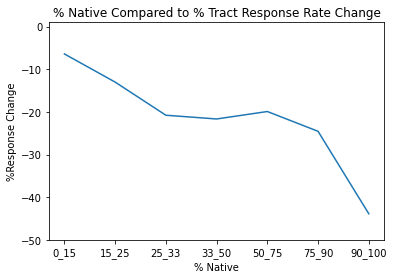

In [310]:
# native % vs rate bins

temp = npr[['State','10_20_tract_difference', 'nativeBins']]
temp['10_20_tract_difference'] = temp['10_20_tract_difference']

temp = temp.groupby('nativeBins').mean()
x = temp.index
y = temp['10_20_tract_difference']

#create mean line
#y_mean = [np.mean(y)]*len(x)
#fig,ax = plt.subplots()

# plotting the points  
plt.plot(x, y)

# Plot the average line
#mean_line = ax.plot(x,y_mean, label='Mean', linewidth=1, linestyle='--')

#change y axis limits
plt.ylim([-50,1])

# naming the x axis 
plt.xlabel('% Native') 
# naming the y axis 
plt.ylabel('%Response Change') 
# giving a title to my graph 
plt.title('% Native Compared to % Tract Response Rate Change')
# Make a legend
legend = ax.legend(loc='upper right')

#plt.savefig('/content/drive/Shared drives/Shared Items/census-responses/data/no_comp_change_npr.png',
#            bbox_inches='tight')

# function to show the plot 
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


AttributeError: ignored

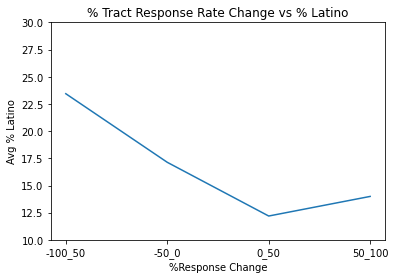

In [333]:
# latino % vs rate bins

temp = npr[['State','10_20_tract_difference', 'rateBins', 'latino_pct']]
temp['10_20_tract_difference'] = temp['10_20_tract_difference']

temp = temp.groupby('rateBins').mean()
x = temp.index
y = temp['latino_pct']

# plotting the points  
plt.plot(x, y)

#change y axis limits
plt.ylim([10,30])

# naming the x axis 
plt.xlabel('%Response Change') 
# naming the y axis 
plt.ylabel('Avg % Latino') 
# giving a title to my graph 
plt.title('% Tract Response Rate Change vs % Latino')
# Make a legend
legend = ax.legend(loc='upper right')

#plt.savefig('/content/drive/Shared drives/Shared Items/census-responses/data/no_comp_change_npr.png',
#            bbox_inches='tight')

# function to show the plot 
plt.gca().coord_flip()
plt.show()


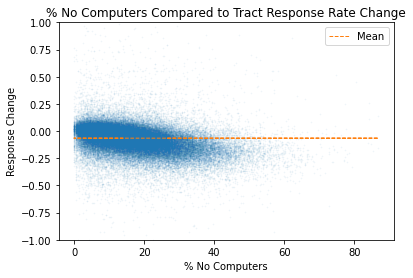

In [ ]:
## comp vs tract change

x = npr.no_int_pct
y = npr['10_20_tract_difference'] / 100

#create mean line
y_mean = [np.mean(y)]*len(x)
fig,ax = plt.subplots()

# plotting the points  
plt.plot(x, y, marker='o', linewidth=0, markersize=0.7, alpha=0.05) 

# Plot the average line
mean_line = ax.plot(x,y_mean, label='Mean', linewidth=1, linestyle='--')

#change y axis limits
plt.ylim([-1,1])

# naming the x axis 
plt.xlabel('% No Computers') 
# naming the y axis 
plt.ylabel('Response Change') 
# giving a title to my graph 
plt.title('% No Computers Compared to Tract Response Rate Change')
# Make a legend
legend = ax.legend(loc='upper right')

plt.savefig('/content/drive/Shared drives/Shared Items/census-responses/data/no_comp_change_npr.png',
            bbox_inches='tight')

# function to show the plot 
plt.show() 


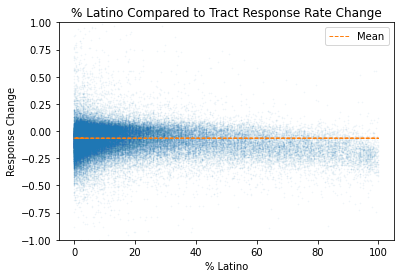

In [ ]:
## latino vs tract change

x = npr.latino_pct
y = npr['10_20_tract_difference'] / 100

#create mean line
y_mean = [np.mean(y)]*len(x)
fig,ax = plt.subplots()

# plotting the points  
plt.plot(x, y, marker='o', linewidth=0, markersize=0.7, alpha=0.05) 

# Plot the average line
mean_line = ax.plot(x,y_mean, label='Mean', linewidth=1, linestyle='--')

#change y axis limits
plt.ylim([-1,1])

# Make a legend
legend = ax.legend(loc='upper right')

# naming the x axis 
plt.xlabel('% Latino') 
# naming the y axis 
plt.ylabel('Response Change') 
# giving a title to my graph 
plt.title('% Latino Compared to Tract Response Rate Change') 

#plt.savefig('/content/drive/Shared drives/Shared Items/census-responses/data/latino_change_npr.png',
#            bbox_inches='tight')

# function to show the plot 
plt.show() 


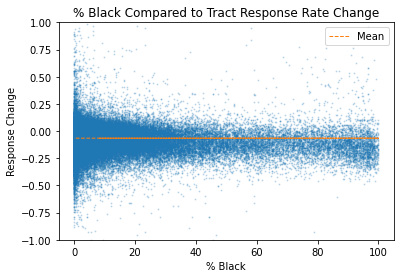

In [ ]:
#% black compared to reponse rate change
x = npr.black_pct
y = npr['10_20_tract_difference'] /100

#create mean line
y_mean = [np.mean(y)]*len(x)
fig,ax = plt.subplots()

# plotting the points  
plt.plot(x, y, marker='o', linewidth=0, markersize=1, alpha=0.2) 

# Plot the average line
mean_line = ax.plot(x,y_mean, label='Mean', linewidth=1, linestyle='--')

#change y axis limits
plt.ylim([-1,1])

# naming the x axis 
plt.xlabel('% Black') 
# naming the y axis 
plt.ylabel('Response Change') 
# Make a legend
legend = ax.legend(loc='upper right')
# giving a title to my graph 
plt.title('% Black Compared to Tract Response Rate Change') 

plt.savefig('/content/drive/Shared drives/Shared Items/census-responses/data/black_change_nopr.png',
            bbox_inches='tight')

# function to show the plot 
plt.show() 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


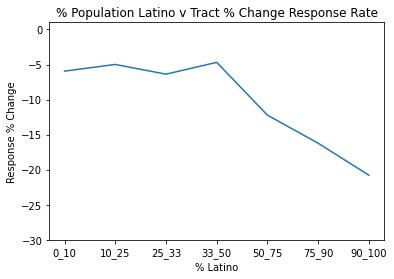

In [304]:
#average response change per share latino pop

temp = npr[['State','10_20_tract_difference', 'latinoBins']]
temp['10_20_tract_difference'] = temp['10_20_tract_difference']

temp = temp.groupby('latinoBins').mean()
x = temp.index
y = temp['10_20_tract_difference'] 

# plotting the points  
plt.plot(x, y) 

#change y axis limits
plt.ylim([-30,1])

# naming the x axis 
plt.xlabel('% Latino') 
# naming the y axis 
plt.ylabel('Response % Change') 
#add legend
#plt.legend(loc=2)
# giving a title to my graph 
plt.title('% Population Latino v Tract % Change Response Rate') 

plt.savefig('/content/drive/Shared drives/Shared Items/census-responses/data/latinotemp_change_nopr.png',
            bbox_inches='tight')

# function to show the plot 
plt.show() 


### National Comparative Rankings 2010 vs 2020

In [ ]:
# average difference by region
states.groupby('Region').mean().sort_values(by='10_20_state_difference', ascending=False)

In [ ]:
#assign ranks to states based on comparative response rate
states['2020_rank'] = states['2020_state_rate'].rank(method='max', ascending=False)
states['2010_rank'] = states['2010_state_rate'].rank(method='max', ascending=False)

#pull ranks into separate dataframe
state_ranks = states[['State', '2020_rank', '2010_rank']].sort_values(by='2020_rank')

#show change in rank from 2010 to 2020
#negative number means a state has a lower 2020 response rate and has gone down in rankings
state_ranks['rank_change'] = state_ranks['2010_rank'] - state_ranks['2020_rank']
#state_ranks.sort_values(by='rank_change', ascending=True)

#see how many states only changed 2 or fewer positions
#small_change = state_ranks[state_ranks.rank_change.between(-2, 2, inclusive=True)].sort_values(by='rank_change')
#small_change
#16 states have stayed ~similar in the rankings, and this seems to impact
#states with both high and low response rates
#small_change.mean(axis=0)['2020_rank']

## Regressions

In [273]:
#drop all na,inf, str values for regression
temp = df.replace([np.inf, -np.inf], np.nan).dropna().drop(
    columns=['Geo_Name','county','State', 'Region', 'party', 'FIPS'])

#normalize data
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    dataNorm["10_20_tract_difference"]=dataset["10_20_tract_difference"]
    return dataNorm
  
dfNorm=normalize(temp)

#reattach state to filter out pr
dfNorm['State'] = pd.Series(df.State)

### % Change Without Puerto Rico

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff741b6ec88>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff741d668d0>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff739409630>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff74bfb6780>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff73bdbad30>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff73485e5f8>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff741b52a20>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff74e31b2e8>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff74f551b70>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff74ead3470>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff74dfa3b00>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff739405cf8>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff74df99e48>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff74e385390>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7514bd8d0>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff73c1a0160>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff738f449e8>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff74dcf92e8>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff739987b70>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff73853b438>]],
      dtype=object)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff731d8ccf8>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7341bc5f8>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff733f94e80>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7379b9710>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff737ddff98>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff735755860>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff72c26b128>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff72d94d9b0>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7390512b0>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff74b887b00>]],
      dtype=object)

ValueError: ignored

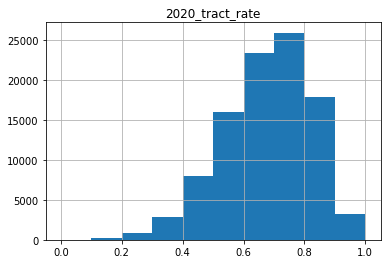

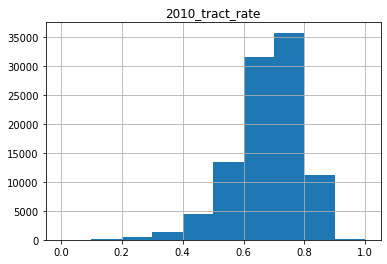

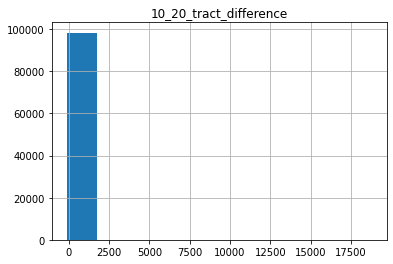

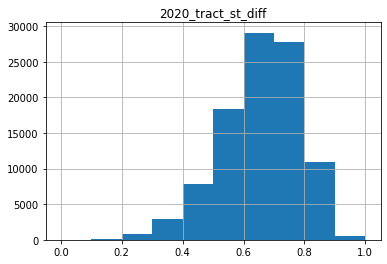

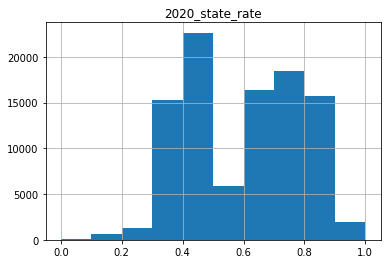

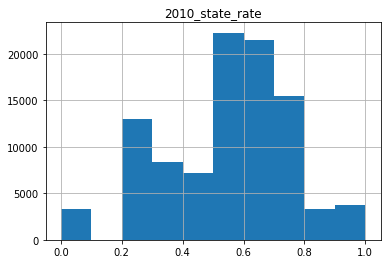

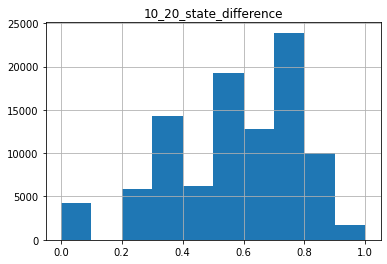

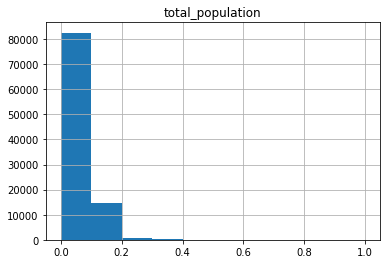

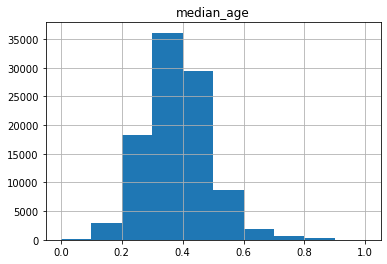

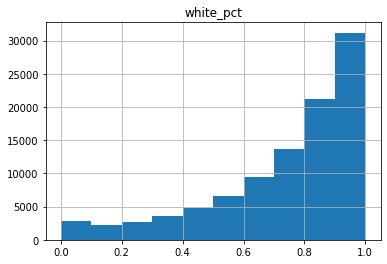

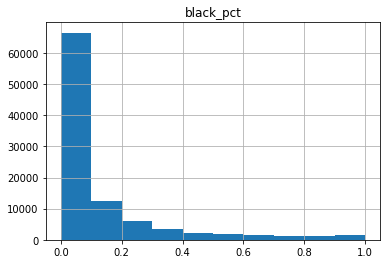

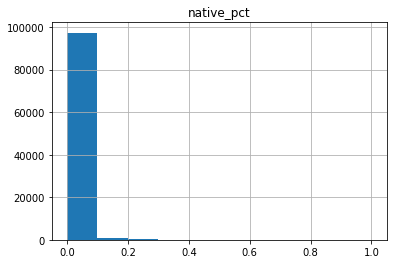

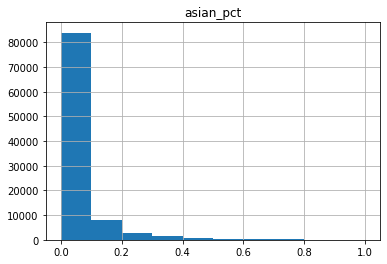

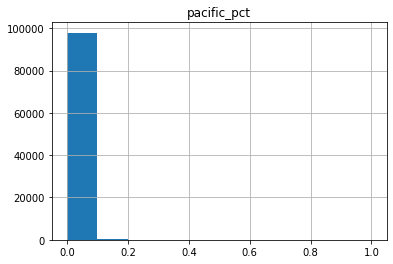

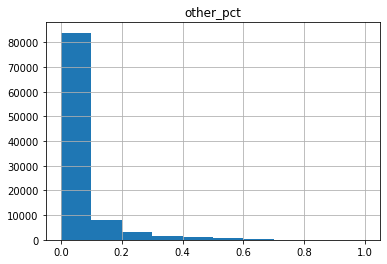

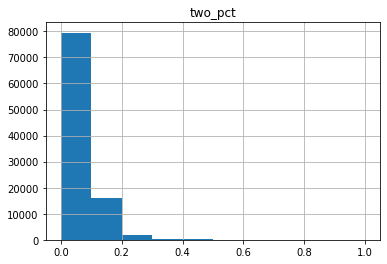

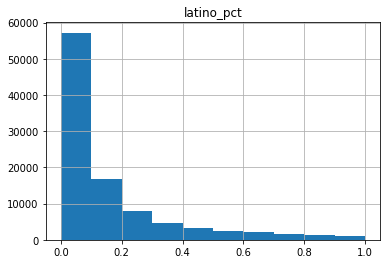

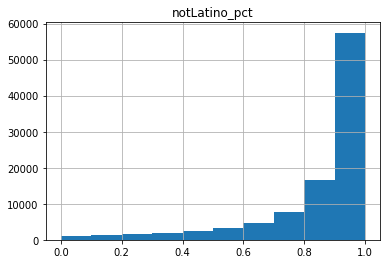

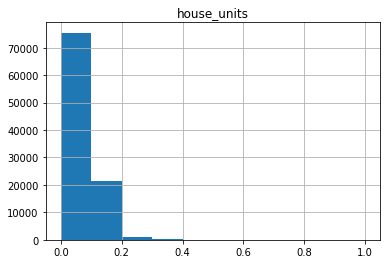

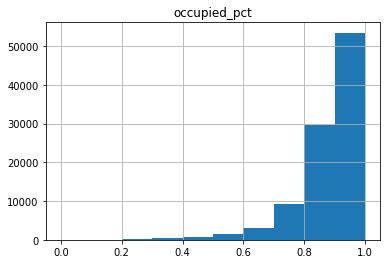

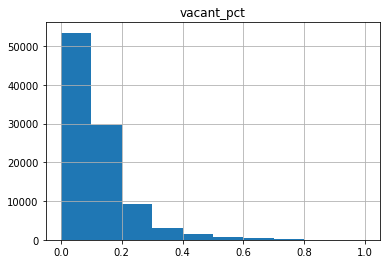

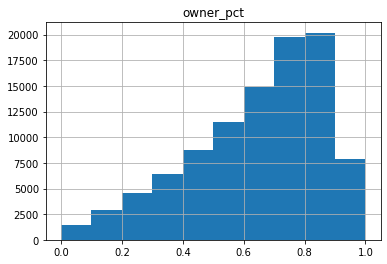

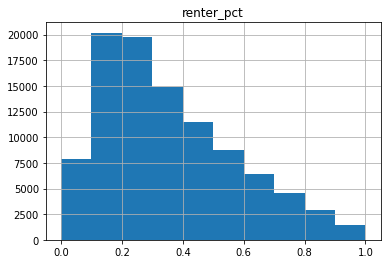

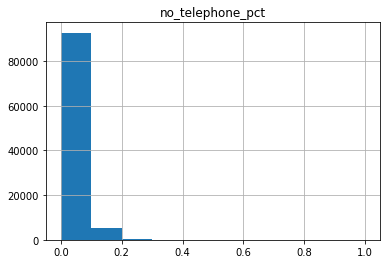

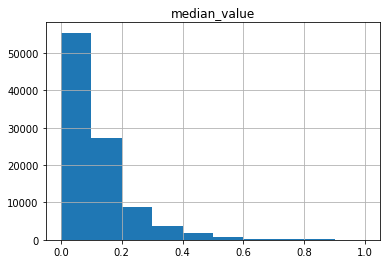

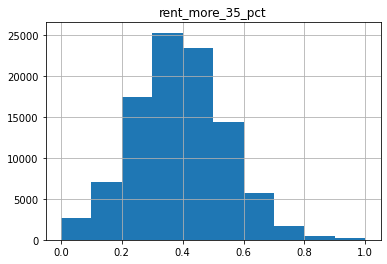

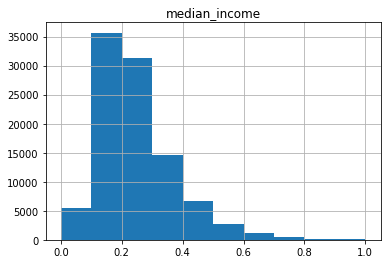

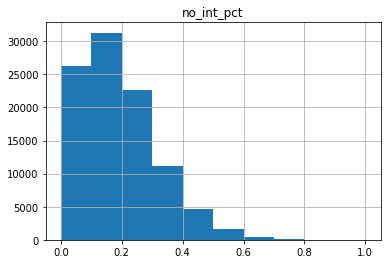

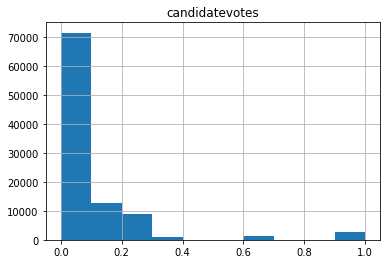

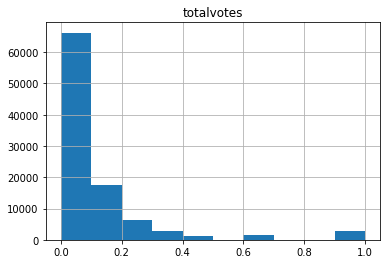

In [274]:
nprNorm = dfNorm[dfNorm.State != 'Puerto Rico']

for i in nprNorm.columns:
  display(nprNorm[[i]].hist())

#### 2020 regressions

In [275]:
### 2020 Multi-regression

import statsmodels.api as sm

#put all variables for predicting 2020 rates in dataframe
X = nprNorm[['2010_tract_rate', '2010_state_rate',
 'total_population', 'median_age', 'white_pct', 'black_pct', 'native_pct', 
 'asian_pct', 'pacific_pct', 'other_pct', 'two_pct', 'latino_pct', 
 'notLatino_pct', 'house_units', 'occupied_pct', 'vacant_pct', 'owner_pct', 
 'renter_pct', 'no_telephone_pct',
 'median_value', 'rent_more_35_pct', 'median_income', 'no_int_pct']]

#what we want to predict - 2020 response rates - in dataframe
y = nprNorm[["10_20_tract_difference"]]

#build model and print summary
print(sm.OLS(y, X).fit().summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                   OLS Regression Results                                  
Dep. Variable:     10_20_tract_difference   R-squared (uncentered):                   0.030
Model:                                OLS   Adj. R-squared (uncentered):              0.030
Method:                     Least Squares   F-statistic:                              132.2
Date:                    Tue, 11 Aug 2020   Prob (F-statistic):                        0.00
Time:                            01:54:01   Log-Likelihood:                     -5.4790e+05
No. Observations:                   98303   AIC:                                  1.096e+06
Df Residuals:                       98280   BIC:                                  1.096e+06
Df Model:                              23                                                  
Covariance Type:                nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.

In [337]:
### 2020 linear regressions for each variable
pd.set_option('display.max_columns', None)
temp = nprNorm[["10_20_tract_difference", '2010_tract_rate', '2010_state_rate',
 'total_population', 'median_age', 'white_pct', 'black_pct', 'native_pct', 
 'asian_pct', 'pacific_pct', 'other_pct', 'two_pct', 'latino_pct', 
 'notLatino_pct', 'house_units', 'occupied_pct', 'vacant_pct', 'owner_pct', 
 'renter_pct', 'no_telephone_pct', 'median_value', 'rent_more_35_pct', 
 'median_income', 'no_int_pct']]

fit_d = {}  # This will hold all of the fit results and summaries
for col in [x for x in temp.columns if x != '10_20_tract_difference']:
    Y = temp['10_20_tract_difference']
  
    X = temp[col]
    X = sm.add_constant(X)  # Add a constant to the fit

    fit_d[col] = sm.OLS(Y,X).fit()
    print(fit_d[col].summary().tables[1])

                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.5433      1.289      1.974      0.048       0.018       5.069
2010_tract_rate   -13.3243      1.872     -7.118      0.000     -16.993      -9.655
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -10.3492      0.592    -17.481      0.000     -11.510      -9.189
2010_state_rate     6.9777      1.010      6.911      0.000       4.999       8.957
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -9.5736      0.400    -23.906      0.000     -10.358      -8.789
total_population    43.5732      4.893      8.904      0.000      33.982 

In [339]:
### 2020 edited multi-regressions
#Edited = Run regressions with fewer variables

#put all variables for predicting 2020 rates in dataframe
X = nprNorm[['white_pct', 'black_pct', 'native_pct', 'asian_pct', 
                      'latino_pct', 'vacant_pct', 'renter_pct', 
                      'no_telephone_pct', 'median_value', 'rent_more_35_pct',
                      'median_income', 'no_int_pct']]

#what we want to predict - 2020 response rates - in dataframe
y = nprNorm[["2020_tract_rate"]]

#build and fit the multi-regression model
print(sm.OLS(y, X).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:        2020_tract_rate   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          3.926e+05
Date:                Tue, 11 Aug 2020   Prob (F-statistic):                        0.00
Time:                        02:57:02   Log-Likelihood:                          87951.
No. Observations:               98303   AIC:                                 -1.759e+05
Df Residuals:                   98291   BIC:                                 -1.758e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

#### 2010 Regressions

In [ ]:
### 2010 multi regression

#put all variables for predicting 2010 rates in dataframe
X = nprNorm[['total_population', 'median_age', 'white_pct', 
                     'black_pct', 'native_pct', 'asian_pct', 'pacific_pct',
                     'other_pct', 'two_pct', 'latino_pct', 'notLatino_pct',
                     'house_units', 'occupied_pct', 'vacant_pct', 'renter_pct',
                     'no_telephone_pct', 'median_value', 'rent_more_35_pct',
                     'median_income', 'no_int_pct']]

#what we want to predict - 2010 response rates - in separate dataframe
y = nprNorm[["2010_tract_rate"]]

#create model and print summary table
#print(sm.OLS(y, X).fit().summary())

In [ ]:
### 2010 linear regression for each variable

temp = nprNorm[['2010_tract_rate','total_population', 'median_age', 'white_pct', 
              'black_pct', 'native_pct',  'asian_pct','pacific_pct','other_pct',
              'two_pct', 'latino_pct',  'notLatino_pct', 'house_units', 
              'occupied_pct', 'vacant_pct', 'owner_pct',  'renter_pct', 
              'no_telephone_pct', 'median_value', 'rent_more_35_pct', 
              'median_income', 'no_int_pct']]

fit_d = {}  # This will hold all of the fit results and summaries
for col in [x for x in temp.columns if x != '2010_tract_rate']:
    Y = temp['2010_tract_rate']
    
    X = temp[col]
    X = sm.add_constant(X)  # Add a constant to the fit

    fit_d[col] = sm.OLS(Y,X).fit()
    print(fit_d[col].summary().tables[1])

### Puerto Rico

In [348]:
#create df with just puerto rico
pr = df[df['State'] == 'Puerto Rico']

#### 2020 regressions

In [349]:
### 2020 Multi-regression

import statsmodels.api as sm

#put all variables for predicting 2020 rates in dataframe
X = pr[['2010_tract_rate', 'total_population', 'median_age', 
                  'white_pct', 'black_pct', 'native_pct', 'asian_pct',
                  'pacific_pct', 'other_pct', 'two_pct', 'latino_pct',  
                  'notLatino_pct', 'house_units', 'occupied_pct', 'vacant_pct',
                  'owner_pct','renter_pct', 'no_telephone_pct', 'median_value',
                  'rent_more_35_pct', 'median_income', 'no_int_pct']]

#what we want to predict - 2020 response rates - in dataframe
y = pr[["10_20_tract_difference"]]

#build model and print summary
print(sm.OLS(y, X).fit().summary())

MissingDataError: ignored

In [350]:
### 2020 linear regressions for each variable

temp = pr[['10_20_tract_difference', 'white_pct', 'black_pct', 'native_pct', 
              'asian_pct', 'latino_pct', 'vacant_pct', 'renter_pct', 
              'no_telephone_pct', 'median_value', 'rent_more_35_pct', 
              'median_income', 'no_int_pct']]

fit_d = {}  # This will hold all of the fit results and summaries
for col in [x for x in temp.columns if x != '10_20_tract_difference']:
    Y = temp['10_20_tract_difference']
    
    X = temp[col]
    X = sm.add_constant(X)  # Add a constant to the fit

    fit_d[col] = sm.OLS(Y,X).fit()
    print(fit_d[col].summary().tables[1])

MissingDataError: ignored

In [343]:
### 2020 edited linear regressions
# Edited = Run regressions with fewer variables

temp = pr[["10_20_tract_difference", 'white_pct', 'black_pct', 'native_pct', 
              'asian_pct','pacific_pct','latino_pct', 'vacant_pct','renter_pct',
              'no_telephone_pct','median_value','rent_more_35_pct',
              'median_income','no_int_pct']]

fit_d = {}  # This will hold all of the fit results and summaries
for col in [x for x in temp.columns if x != '10_20_tract_difference']:
    Y = temp['10_20_tract_difference']
   
    X = temp[col]
    X = sm.add_constant(X)  # Add a constant to the fit

    fit_d[col] = sm.OLS(Y,X).fit()
    print(fit_d[col].summary().tables[1])

ValueError: ignored

#### 2010 Regressions

In [ ]:
### 2010 multi regression

#put all variables for predicting 2010 rates in dataframe
X = pr[['total_population', 'median_age',
                  'white_pct', 'black_pct', 'native_pct', 'asian_pct',
                  'pacific_pct', 'other_pct', 'two_pct', 'latino_pct', 
                  'notLatino_pct', 'house_units', 'occupied_pct', 'vacant_pct',
                  'owner_pct','renter_pct', 'no_telephone_pct', 'median_value',
                  'rent_more_35_pct', 'median_income', 'no_int_pct']]

#what we want to predict - 2010 response rates - in separate dataframe
y = pr[["2010_tract_rate"]]

#create model and print summary table
print(sm.OLS(y, X).fit().summary())

In [ ]:
### 2010 linear regression for each variable

temp = pr[['2010_tract_rate','total_population', 'median_age','white_pct', 
           'black_pct', 'native_pct', 'asian_pct', 'pacific_pct', 'other_pct', 
           'two_pct','latino_pct','notLatino_pct','house_units', 'occupied_pct', 
           'vacant_pct', 'owner_pct','renter_pct', 'no_telephone_pct', 
           'median_value', 'rent_more_35_pct', 'median_income', 'no_int_pct']]

fit_d = {}  # This will hold all of the fit results and summaries
for col in [x for x in temp.columns if x != '2010_tract_rate']:
    Y = temp['2010_tract_rate']
    
    X = temp[col]
    X = sm.add_constant(X)  # Add a constant to the fit

    fit_d[col] = sm.OLS(Y,X).fit()
    print(fit_d[col].summary().tables[1])

# Scrap Code

## Analysis with Puerto Rico

### 2010-2020 Changes

In [96]:
display(states.sort_values(by='10_20_state_difference'))

,GEO_ID,State,Region,2020_state_rate,2010_state_rate,2000_state_rate,10_20_state_difference
51,0400000US72,Puerto Rico,Puerto Rico,28.3,54.0,54.0,-47.592593
40,0400000US45,South Carolina,South,57.4,75.0,68.0,-23.466667
1,0400000US02,Alaska,West,49.8,64.0,67.0,-22.187500
33,0400000US37,North Carolina,South,59.3,76.0,69.0,-21.973684
9,0400000US12,Florida,South,60.1,74.0,71.0,-18.783784
19,0400000US23,Maine,Northeast,55.4,68.0,67.0,-18.529412
10,0400000US13,Georgia,South,58.9,72.0,72.0,-18.194444
43,0400000US48,Texas,South,58.2,71.0,70.0,-18.028169
31,0400000US35,New Mexico,West,53.4,65.0,68.0,-17.846154
42,0400000US47,Tennessee,South,62.5,76.0,72.0,-17.763158


In [95]:
display(states.sort_values(by='2020_state_rate'))

,GEO_ID,State,Region,2020_state_rate,2010_state_rate,2000_state_rate,10_20_state_difference
51,0400000US72,Puerto Rico,Puerto Rico,28.3,54.0,54.0,-47.592593
1,0400000US02,Alaska,West,49.8,64.0,67.0,-22.187500
31,0400000US35,New Mexico,West,53.4,65.0,68.0,-17.846154
48,0400000US54,West Virginia,South,54.8,65.0,68.0,-15.692308
19,0400000US23,Maine,Northeast,55.4,68.0,67.0,-18.529412
45,0400000US50,Vermont,Northeast,56.8,69.0,68.0,-17.681159
26,0400000US30,Montana,West,56.8,68.0,72.0,-16.470588
18,0400000US22,Louisiana,South,57.3,65.0,68.0,-11.846154
40,0400000US45,South Carolina,South,57.4,75.0,68.0,-23.466667
50,0400000US56,Wyoming,West,57.5,69.0,75.0,-16.666667


In [54]:
temp = df[df['State']=='Puerto Rico'].sort_values(by='2020_tract_rate', ascending=False)

print("# Puerto Rico Tracts with 2020 response rate greater than 2010:",
      len(temp[temp['2020_tract_rate'] >= temp['2010_tract_rate']]), 
      "\n\n", temp[temp['2020_tract_rate'] >= temp['2010_tract_rate']].sort_values(by='2020_tract_rate', ascending=False))


# Puerto Rico Tracts with 2020 response rate greater than 2010: 0 

 Empty DataFrame
Columns: [Geo_Name, county, State, 2020_tract_rate, 2010_tract_rate, 10_20_tract_difference, 2020_tract_st_diff, 2020_state_rate, 2010_state_rate, 10_20_state_difference, total_population, median_age, white_pct, black_pct, native_pct, asian_pct, pacific_pct, other_pct, two_pct, latino_pct, notLatino_pct, house_units, occupied_pct, vacant_pct, owner_pct, renter_pct, no_telephone_pct, median_value, rent_more_35_pct, median_income, no_int_pct, Region, FIPS, party, candidatevotes, totalvotes]
Index: []


In [55]:
#how many tracts have lower response rate than in 2010
lower = df.loc[(df['2020_tract_rate'] < df['2010_tract_rate']
            ) & (df['10_20_tract_difference'] != -1)].sort_values(
        by='10_20_tract_difference', ascending=True)
            
#see what percent of state tracts have lower response
temp = pd.merge(pd.DataFrame(lower['State'].value_counts()).reset_index().rename(columns={'index':'state', 'State':'count_lower'}),
    pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index':'state', 'State':'count'}),
    on=['state'])

temp['lower_percent'] = (temp['count_lower']*100) / temp['count']

print(
    "Total lower tracts:", sum(temp['count_lower']),
    '\nLowers as % of all tracts:', 
    (sum(temp['count_lower'])*100) / sum(temp['count']), "\n",
    len(lower), "of", len(df), "total tracts, or", len(lower)*100/len(df), "% have lower \nresponse rates in 2020 than 2010\n",
    "\n",temp.sort_values(by="lower_percent"), "\n\n",)

Total lower tracts: 75759 
Lowers as % of all tracts: 73.1688236430365 
 75759 of 103540 total tracts, or 73.1688236430365 % have lower 
response rates in 2020 than 2010
 
                    state  count_lower  count  lower_percent
31            Washington          955   2404      39.725458
45                 Idaho          252    567      44.444444
14              Michigan         1577   3340      47.215569
49         New Hampshire          194    409      47.432763
38                Nevada          455    890      51.123596
36                  Utah          535    991      53.985873
24               Arizona         1169   2079      56.228956
27              Colorado          994   1732      57.390300
33                Oregon          757   1309      57.830405
29              Kentucky          976   1585      61.577287
20             Minnesota         1247   2015      61.885856
13              Virginia         1588   2510      63.266932
23         Massachusetts         1208   1867   

In [ ]:
#tracts with 2020 response rate > 2010
higher = df.loc[(df['2020_tract_rate'] > df['2010_tract_rate']
            ) & (df['2010_tract_rate'] != 0)].sort_values(
        by='10_20_tract_difference', ascending=True)
            
temp = pd.merge(pd.DataFrame(higher['State'].value_counts()).reset_index().rename(columns={'index':'state', 'State':'count_higher'}),
                pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index':'state', 'State':'count'}),
                on=['state'])

temp['higher_percent'] = (temp['count_higher']*100) / temp['count']

print(
    "Total higher tracts:", sum(temp['count_higher']),
    '\nHighers as % of all tracts:', 
    (sum(temp['count_higher'])*100) / sum(temp['count']), "\n",
    len(higher), "of", len(df), "total tracts, or", len(higher)*100/len(df), 
    "% have higher \nresponse rates in 2020 than 2010\n\n",
    temp.sort_values(by="higher_percent"), "\n\n")

In [78]:
# some stats on tracts with lower and higher rates
display(lower.describe())
display(df.describe())
display(higher.describe())
print('Higher rates vote:\n', higher.party.value_counts(),
      '\n\nDf rates vote:\n', df.party.value_counts(),
      '\n\nLower rates vote:\n', lower.party.value_counts())

,2020_tract_rate,2010_tract_rate,10_20_tract_difference,2020_tract_st_diff,2020_state_rate,2010_state_rate,10_20_state_difference,total_population,median_age,white_pct,black_pct,native_pct,asian_pct,pacific_pct,other_pct,two_pct,latino_pct,notLatino_pct,house_units,occupied_pct,vacant_pct,owner_pct,renter_pct,no_telephone_pct,median_value,rent_more_35_pct,median_income,no_int_pct,FIPS,candidatevotes,totalvotes
count,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,71948.000000,7.194800e+04,71948.000000,71948.000000,71948.000000,71948.000000,7.194800e+04,7.194800e+04
mean,60.090022,67.611432,-11.693117,-2.824487,62.914509,73.701479,-14.664954,4789.728040,39.234567,72.267920,14.614465,0.798128,4.344402,0.161754,4.774960,3.038016,17.209134,82.790909,2049.014316,87.013629,12.986458,62.443198,37.556905,2.360267,2.320798e+05,39.615832,59509.573442,18.729363,28208.280119,2.566264e+05,3.955286e+05
std,12.785205,10.296623,9.630948,12.388909,4.334186,3.711616,3.290819,2779.591257,7.688716,25.333895,22.238413,2.904773,8.748836,1.111098,8.787657,3.056551,22.392800,22.392807,1075.550425,10.665781,10.665769,21.913849,21.913836,2.158943,2.069097e+05,15.123427,28138.194151,11.078247,15788.478003,4.934168e+05,6.974649e+05
min,0.000000,6.800000,-100.000000,-65.700000,49.800000,64.000000,-23.466667,52.000000,12.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.700000,0.000000,0.900000,0.400000,0.000000,1.000000e+04,0.000000,3894.000000,0.000000,1001.000000,9.900000e+01,1.590000e+02
25%,51.900000,61.700000,-16.544656,-10.200000,58.900000,71.000000,-17.763158,3021.000000,33.900000,59.300000,1.000000,0.000000,0.200000,0.000000,0.200000,1.100000,2.600000,78.200000,1341.000000,83.400000,6.000000,47.800000,19.900000,0.900000,1.070000e+05,29.500000,40667.000000,10.309278,13089.000000,2.055300e+04,3.200000e+04
50%,61.200000,68.700000,-9.574468,-1.700000,63.300000,74.000000,-14.459459,4316.000000,38.900000,80.700000,4.600000,0.100000,1.200000,0.000000,1.300000,2.300000,7.400000,92.600000,1868.000000,89.700000,10.300000,67.000000,33.000000,1.900000,1.633000e+05,39.400000,53420.500000,17.309564,29021.000000,7.868800e+04,1.349830e+05
75%,69.400000,74.800000,-4.421326,5.900000,67.100000,76.000000,-11.710526,5973.000000,44.100000,92.400000,17.600000,0.700000,4.300000,0.000000,4.900000,4.100000,21.800000,97.400000,2552.000000,94.000000,16.600000,80.100000,52.200000,3.200000,2.774000e+05,49.400000,71359.500000,25.215254,42017.000000,2.729260e+05,4.212090e+05
max,92.500000,100.000000,-0.111732,33.200000,72.400000,82.000000,-7.638889,70271.000000,83.500000,100.000000,100.000000,96.800000,93.400000,60.900000,84.000000,49.900000,100.000000,100.000000,26436.000000,100.000000,98.300000,99.600000,99.100000,40.300000,1.995100e+06,100.000000,250000.000000,86.920981,56045.000000,2.464364e+06,3.434308e+06


,2020_tract_rate,2010_tract_rate,10_20_tract_difference,2020_tract_st_diff,2020_state_rate,2010_state_rate,10_20_state_difference,total_population,median_age,white_pct,black_pct,native_pct,asian_pct,pacific_pct,other_pct,two_pct,latino_pct,notLatino_pct,house_units,occupied_pct,vacant_pct,owner_pct,renter_pct,no_telephone_pct,median_value,rent_more_35_pct,median_income,no_int_pct,FIPS,candidatevotes,totalvotes
count,103540.000000,102847.000000,1.028380e+05,103540.000000,103540.000000,103540.000000,103540.000000,103540.000000,103321.000000,103336.000000,103336.000000,103336.000000,103336.000000,103336.000000,103336.000000,103336.000000,103336.000000,103336.000000,103540.000000,103294.000000,103294.000000,103270.000000,103270.000000,102398.000000,1.015520e+05,103123.000000,102963.000000,103270.000000,102048.000000,1.020230e+05,1.020480e+05
mean,62.546602,67.690365,inf,-0.305365,62.851967,73.618041,-14.762507,4949.205833,39.463309,73.245816,13.083205,0.889803,4.900626,0.170504,4.527902,3.181698,17.133094,82.866948,2087.127487,87.810794,12.189295,63.984057,36.016050,2.266941,2.521893e+05,39.182103,64252.382565,17.074833,27781.561912,2.543681e+05,4.000174e+05
std,14.490552,11.313510,NaN,13.324594,5.760044,4.247514,4.861022,2963.114947,7.819423,24.336115,20.767391,4.403487,9.112682,1.097695,8.458077,3.116841,22.717655,22.717659,1146.099229,10.974492,10.974486,22.449101,22.449104,2.280203,2.144128e+05,15.467814,31698.656049,11.583500,16033.544848,4.530160e+05,6.465683e+05
min,0.000000,0.000000,-1.000000e+02,-68.900000,28.300000,54.000000,-47.592593,0.000000,5.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+04,0.000000,3025.000000,0.000000,1001.000000,5.800000e+01,0.000000e+00
25%,53.500000,61.700000,-1.417445e+01,-8.200000,58.900000,71.000000,-17.763158,3119.000000,34.200000,61.700000,1.000000,0.000000,0.300000,0.000000,0.200000,1.200000,2.800000,79.100000,1360.000000,84.400000,5.100000,50.200000,18.500000,0.800000,1.172000e+05,29.000000,42359.500000,8.201893,12115.000000,2.729400e+04,4.456000e+04
50%,64.300000,69.200000,-5.970149e+00,1.200000,64.500000,74.000000,-14.025974,4450.000000,39.100000,81.300000,4.200000,0.100000,1.600000,0.000000,1.300000,2.400000,7.600000,92.400000,1898.000000,90.800000,9.200000,69.100000,30.900000,1.800000,1.817000e+05,38.900000,57348.000000,15.015480,27117.000000,1.019440e+05,1.783120e+05
75%,73.400000,75.500000,2.544529e-01,9.400000,67.300000,76.000000,-11.666667,6132.000000,44.200000,92.100000,14.700000,0.600000,5.200000,0.000000,4.700000,4.300000,20.900000,97.200000,2594.000000,94.900000,15.600000,81.500000,49.800000,3.100000,3.110000e+05,49.100000,78846.000000,23.436323,41071.000000,2.970510e+05,4.402470e+05
max,98.100000,100.000000,inf,39.200000,72.400000,82.000000,-7.638889,70271.000000,84.500000,100.000000,100.000000,100.000000,93.400000,76.200000,100.000000,66.700000,100.000000,100.000000,26436.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.995100e+06,100.000000,250000.000000,100.000000,56045.000000,2.464364e+06,3.434308e+06


,2020_tract_rate,2010_tract_rate,10_20_tract_difference,2020_tract_st_diff,2020_state_rate,2010_state_rate,10_20_state_difference,total_population,median_age,white_pct,black_pct,native_pct,asian_pct,pacific_pct,other_pct,two_pct,latino_pct,notLatino_pct,house_units,occupied_pct,vacant_pct,owner_pct,renter_pct,no_telephone_pct,median_value,rent_more_35_pct,median_income,no_int_pct,FIPS,candidatevotes,totalvotes
count,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,2.577600e+04,25776.000000,25776.000000,25776.000000,25776.000000,2.577600e+04,2.577600e+04
mean,72.690173,69.205206,7.805191,8.193343,64.496830,74.430439,-13.377704,5525.971291,40.523634,77.398208,8.883318,0.551757,6.499922,0.192454,3.048049,3.425718,12.231688,87.768335,2247.122284,91.369588,8.630490,70.548549,29.451563,1.811887,3.128888e+05,37.382189,79710.951311,11.199691,26151.159412,2.431272e+05,4.070484e+05
std,11.130189,12.452915,123.556349,10.585056,4.102612,3.452868,3.008145,3310.201565,7.493594,20.236983,15.609961,1.943185,9.901500,0.936190,5.129439,2.817315,13.930797,13.930790,1264.316492,8.908099,8.908098,19.444669,19.444680,1.804980,2.208928e+05,15.642884,33638.384192,8.282207,16360.063468,3.054816e+05,4.672237e+05
min,2.800000,0.300000,0.110254,-64.600000,49.800000,64.000000,-23.466667,75.000000,12.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,2.100000,0.000000,1.500000,0.200000,0.000000,1.260000e+04,0.000000,3998.000000,0.000000,1001.000000,3.340000e+02,5.140000e+02
25%,67.500000,64.000000,1.639344,3.300000,60.100000,73.000000,-14.683544,3576.750000,35.600000,69.400000,0.900000,0.000000,0.900000,0.000000,0.200000,1.500000,3.000000,83.900000,1480.000000,89.400000,3.500000,59.700000,14.600000,0.700000,1.670000e+05,27.300000,55625.000000,5.233398,12031.000000,5.702300e+04,9.602900e+04
50%,74.700000,71.700000,3.518665,10.000000,65.100000,74.000000,-12.933333,4949.000000,39.900000,83.800000,3.200000,0.100000,2.900000,0.000000,1.100000,2.800000,7.200000,92.800000,2026.000000,93.800000,6.200000,74.900000,25.100000,1.400000,2.517000e+05,37.000000,73580.000000,9.324314,26075.000000,1.430070e+05,2.668630e+05
75%,80.500000,77.800000,6.579372,15.300000,67.900000,77.000000,-11.643836,6675.000000,44.600000,92.000000,9.400000,0.500000,7.700000,0.000000,3.600000,4.700000,16.100000,97.000000,2745.000000,96.500000,10.600000,85.400000,40.300000,2.500000,3.832000e+05,47.000000,97635.000000,15.112607,39133.000000,3.430700e+05,5.811400e+05
max,93.800000,92.900000,18766.666667,34.900000,72.400000,82.000000,-7.638889,70271.000000,81.500000,100.000000,100.000000,93.600000,85.000000,51.000000,75.800000,43.800000,100.000000,100.000000,26436.000000,100.000000,97.900000,99.800000,98.500000,56.600000,1.995100e+06,100.000000,250000.000000,86.920981,56033.000000,2.464364e+06,3.434308e+06


Higher rates vote:
 democrat      14953
republican    10823
Name: party, dtype: int64 

Df rates vote:
 democrat      52783
republican    49265
Name: party, dtype: int64 

Lower rates vote:
 republican    36720
democrat      35228
Name: party, dtype: int64


In [271]:
#lowest tract rates
lowest = npr.sort_values(by='2020_tract_rate').head(1000)
print("1000 lowest tracts comprise", len(lowest) *100 / len(npr), "off all tracts")
display(lowest.Region.value_counts(),
        lowest.describe(),
        npr.describe())

1000 lowest tracts comprise 1.01726295230054 off all tracts


West         366
South        359
Northeast    158
Midwest      117
Name: Region, dtype: int64

,2020_tract_rate,2010_tract_rate,10_20_tract_difference,2020_tract_st_diff,2020_state_rate,2010_state_rate,10_20_state_difference,total_population,median_age,white_pct,black_pct,native_pct,asian_pct,pacific_pct,other_pct,two_pct,latino_pct,notLatino_pct,house_units,occupied_pct,vacant_pct,owner_pct,renter_pct,no_telephone_pct,median_value,rent_more_35_pct,median_income,no_int_pct,FIPS,candidatevotes,totalvotes
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,21.310600,37.057900,-30.618541,-40.218600,61.529200,72.141000,-14.746981,3417.563000,44.838300,78.484800,9.792400,2.814700,2.365000,0.262300,3.729100,2.551300,16.544900,83.455100,2709.004000,54.513200,45.486900,65.463800,34.53630,2.887600,2.539693e+05,40.658600,50755.018000,22.343020,29208.313000,1.171543e+05,1.880423e+05
std,5.260091,15.760787,42.990816,7.086053,4.569278,3.790711,3.635921,2350.206917,12.021226,25.542959,21.416946,10.848077,6.126118,2.689376,8.600416,3.046204,22.946523,22.946523,1885.460454,22.771286,22.771114,23.473531,23.47373,2.810446,2.422548e+05,18.741386,22963.480794,13.298972,16303.289675,3.055376e+05,4.486508e+05
min,0.000000,0.600000,-100.000000,-65.700000,49.800000,64.000000,-23.466667,75.000000,19.400000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,68.000000,1.700000,0.000000,1.500000,2.70000,0.000000,1.330000e+04,0.000000,3894.000000,0.459866,1073.000000,9.900000e+01,1.590000e+02
25%,18.575000,25.700000,-51.898357,-44.500000,58.200000,69.000000,-18.028169,1799.500000,35.900000,71.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,2.200000,80.950000,1423.750000,35.900000,26.700000,55.075000,17.90000,1.100000,9.420000e+04,28.550000,34824.250000,11.437083,12072.500000,7.130000e+03,1.027000e+04
50%,22.750000,35.550000,-36.524391,-39.800000,59.900000,72.000000,-14.637681,2841.500000,44.750000,90.100000,0.900000,0.200000,0.500000,0.000000,0.800000,1.700000,6.400000,93.600000,2315.000000,54.450000,45.550000,72.650000,27.35000,2.300000,1.724000e+05,40.000000,47287.000000,20.017498,34009.000000,2.104950e+04,3.778100e+04
75%,25.500000,47.200000,-19.356187,-34.500000,65.300000,75.000000,-11.666667,4645.250000,54.625000,95.925000,6.100000,1.300000,2.000000,0.000000,3.400000,3.400000,19.050000,97.800000,3483.500000,73.300000,64.100000,82.100000,44.92500,3.900000,3.212000e+05,52.225000,62307.750000,30.987410,42101.000000,8.936775e+04,1.402060e+05
max,27.400000,100.000000,374.545455,-26.000000,72.400000,82.000000,-7.638889,26346.000000,74.000000,100.000000,98.300000,96.800000,82.000000,60.900000,66.300000,33.000000,99.300000,100.000000,15527.000000,100.000000,98.300000,97.300000,98.50000,33.000000,1.923100e+06,100.000000,164118.000000,72.748447,56039.000000,2.464364e+06,3.434308e+06


,2020_tract_rate,2010_tract_rate,10_20_tract_difference,2020_tract_st_diff,2020_state_rate,2010_state_rate,10_20_state_difference,total_population,median_age,white_pct,black_pct,native_pct,asian_pct,pacific_pct,other_pct,two_pct,latino_pct,notLatino_pct,house_units,occupied_pct,vacant_pct,owner_pct,renter_pct,no_telephone_pct,median_value,rent_more_35_pct,median_income,no_int_pct,FIPS,candidatevotes,totalvotes
count,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,98303.000000,9.830300e+04,98303.000000,98303.000000,98303.000000,98303.000000,9.830300e+04,9.830300e+04
mean,63.462467,68.053598,-6.511600,0.122409,63.340058,73.899616,-14.321151,4986.417007,39.582015,73.656198,13.074033,0.731885,4.914309,0.169601,4.312943,3.140615,15.874350,84.125688,2102.056448,88.180560,11.819524,64.616929,35.383177,2.213453,2.535411e+05,39.021877,64901.445175,16.718502,27666.857583,2.529018e+05,3.983806e+05
std,13.560337,10.933295,64.376679,12.887991,4.330288,3.659632,3.266105,2945.217100,7.655609,24.178611,20.822669,2.681971,9.114049,1.065492,8.014252,2.998347,20.597208,20.597211,1131.132795,10.403032,10.403024,21.579040,21.579032,2.083474,2.136017e+05,15.290469,31013.762234,10.919552,15967.821532,4.511582e+05,6.442299e+05
min,0.000000,0.300000,-100.000000,-65.700000,49.800000,64.000000,-23.466667,52.000000,12.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.700000,0.000000,0.900000,0.200000,0.000000,1.000000e+04,0.000000,3894.000000,0.000000,1001.000000,9.900000e+01,1.590000e+02
25%,54.600000,62.200000,-13.605891,-7.700000,58.900000,71.000000,-16.666667,3161.000000,34.400000,62.300000,1.000000,0.000000,0.300000,0.000000,0.200000,1.200000,2.700000,80.300000,1376.000000,84.800000,5.100000,50.900000,18.300000,0.800000,1.184000e+05,28.900000,43220.500000,8.245397,12115.000000,2.686600e+04,4.398700e+04
50%,64.900000,69.500000,-5.684455,1.500000,64.500000,74.000000,-14.025974,4481.000000,39.200000,81.800000,4.100000,0.100000,1.600000,0.000000,1.200000,2.400000,7.300000,92.700000,1909.000000,91.000000,9.000000,69.400000,30.600000,1.700000,1.836000e+05,38.800000,58010.000000,14.880000,27053.000000,1.003980e+05,1.783120e+05
75%,73.700000,75.700000,0.359712,9.600000,67.400000,76.000000,-11.643836,6160.000000,44.200000,92.300000,14.600000,0.600000,5.300000,0.000000,4.500000,4.300000,19.700000,97.300000,2602.000000,94.900000,15.200000,81.700000,49.100000,3.000000,3.140000e+05,48.800000,79328.500000,22.991396,41051.000000,2.945620e+05,4.402470e+05
max,93.800000,100.000000,18766.666667,34.900000,72.400000,82.000000,-7.638889,70271.000000,83.500000,100.000000,100.000000,96.800000,93.400000,60.900000,84.000000,49.900000,100.000000,100.000000,26436.000000,100.000000,98.300000,99.800000,99.100000,56.600000,1.995100e+06,100.000000,250000.000000,86.920981,56045.000000,2.464364e+06,3.434308e+06


In [93]:
# get info on 1000 tracks with greatest drop in response rate
big_drop = df.loc[(
    df['10_20_tract_difference'] > -100) & (
    df['10_20_tract_difference'] < 0)].sort_values(
                  by='10_20_tract_difference', ascending=True)
  

# temp with tracts less than half 2010 rate
temp = big_drop.loc[(big_drop['10_20_tract_difference'] <= -50)]
temp1 = pd.merge(pd.DataFrame(temp.Region.value_counts()).reset_index().rename(columns={'index':'Region', 'Region':'count_half'}),
    pd.DataFrame(df.Region.value_counts()).reset_index().rename(columns={'index':'Region', 'Region':'count_all'}),
        on=['Region'])
temp1['pct_half']= temp1.count_half * 100 / temp1.count_all

print(len(temp), "or", len(temp) / len(df) * 100,
      "% of tracts have a 2020 response rate \n half or less than half their 2010 rate\n\n",
      "\n\nBy region:\n", temp1,
      "\n\nBy state:\n", temp.State.value_counts())

#just get 1000 biggest drops
big_drop = big_drop.head(1000)

1207 or 1.1657330500289742 % of tracts have a 2020 response rate 
 half or less than half their 2010 rate

 

By region:
         Region  count_half  count_all   pct_half
0  Puerto Rico         688       1227  56.071720
1         West         197      23420   0.841161
2        South         181      38821   0.466242
3    Northeast          88      16759   0.525091
4      Midwest          53      23313   0.227341 

By state:
 Puerto Rico       688
California         81
Texas              76
New York           46
New Mexico         28
Arizona            25
Florida            19
Pennsylvania       16
South Carolina     15
North Carolina     13
Missouri           13
Nevada             13
West Virginia      13
Massachusetts      11
Michigan           11
Alaska             10
Oregon             10
Montana            10
Wisconsin           9
Georgia             9
Ohio                7
Utah                6
North Dakota        6
Oklahoma            6
Mississippi         6
Louisiana           6

In [ ]:
# biggest increases in response rates
# get info on 1000 tracks with greatest gain in response rate
big_gain = df.loc[(df['10_20_tract_difference'] > 0) & (
    df['2010_tract_rate'] != 0)].sort_values(
                  by='10_20_tract_difference', ascending=False).head(1000)
print("By region:\n", big_gain.Region.value_counts(),
      "\n\nBy state:\n", big_gain.State.value_counts())

In [ ]:
# some stats on biggest gains and drops
display(big_gain.describe().round(1))
display(df.describe().round(1))
display(big_drop.describe().round(1))

In [ ]:
#info on drops and gains by party
print('Gains vote:\n', big_gain.party.value_counts(),
      '\n\nDf vote:\n', df.party.value_counts(),
      '\n\nDrops vote:\n', big_drop.party.value_counts(), "\n\n")
display(big_gain.groupby('party').describe())
display(df.groupby('party').describe())
display(big_drop.groupby('party').describe().T)

In [ ]:
# how many tracts have 2020 rate double their 2010 rate
print(len(big_gain[big_gain['10_20_tract_difference'] >= 1]) * 100 / len(df),
      "% of tracts have a 2020 response rate at least double their 2010 rate")

In [ ]:
#ensure higher and lower contain data except for inf, 0, na 10_20_difference
temp=df.drop(lower.index).drop(higher.index)

print(len(df), "\n",
      len(higher), "\n",
      len(lower), "\n",
      len(temp), "\n",
      len(higher) + len(lower) + len(temp), "\n",
      "0 change:", len(temp[temp['10_20_tract_difference'] == 0]), "\n\n",
      temp['10_20_tract_difference'].value_counts())

### Graphs

In [ ]:
## latino vs tract change

# make a graph yay
import matplotlib.pyplot as plt 
import matplotlib.cbook as cbook

x = df.latino_pct
y = df['10_20_tract_difference'] / 100

# plotting the points  
plt.plot(x, y, marker='o', linewidth=0, markersize=0.7, alpha=0.05) 

#change y axis limits
plt.ylim([-1,1])

# naming the x axis 
plt.xlabel('% Latino') 
# naming the y axis 
plt.ylabel('Response Change') 
#add legend
#plt.legend(loc=2)
# giving a title to my graph 
plt.title('% Latino Compared to Tract Response Rate Change') 

plt.savefig('/content/drive/Shared drives/Shared Items/census-responses/data/latino_vs_change.png',
            bbox_inches='tight')

# function to show the plot 
plt.show() 


In [ ]:
x = df.black_pct
y = df['10_20_tract_difference']

# plotting the points  
plt.plot(x, y, marker='o', linewidth=0, markersize=0.7, alpha=0.05) 

#change y axis limits
plt.ylim([-1,1])

# naming the x axis 
plt.xlabel('% Black') 
# naming the y axis 
plt.ylabel('Response Change') 
#add legend
#plt.legend(loc=2)
# giving a title to my graph 
plt.title('% Black Compared to Tract Response Rate Change') 

#plt.savefig('/content/drive/Shared drives/Shared Items/census-responses/data/latino_vs_change.png',
#            bbox_inches='tight')

# function to show the plot 
plt.show() 


### Race / Ethnicity

In [ ]:
# show all tracts where Latino population 95% or higher by state
display(df[df.latino_pct >= 95].State.value_counts())

# show all 95 or higher Latino tracts in Texas
display(df.loc[(df.State == 'Texas') & (df.latino_pct >= 95)])

In [ ]:
# compare high percentage Latino tracts to total # tracts in county

temp = pd.merge(pd.DataFrame(df.loc[(df.State == 'Texas') & (df.latino_pct >= 95)].county.value_counts()).reset_index().rename(columns={'index':'county', 'county':'maj_Latino'}),
                 pd.DataFrame(df.loc[(df.State == 'Texas')].county.value_counts()).reset_index().rename(columns={'index':'county', 'county':'total'}),
                 how='left')

#calculate what % all tracts is 95% or more Latino in Texas
temp['maj_Latino_pct'] = (temp['maj_Latino']*100) / temp['total']

print(
    "Total majority latino tracts in Texas:", sum(temp['maj_Latino']),
    '\nMajority Latino as % of all Texas tracts:', (sum(temp['maj_Latino'])*100) / sum(temp['total']),
    "\n\n",temp)

In [ ]:
display(
    "maj Latino",
    pd.DataFrame(df.loc[(df.State == 'Texas') & (df.latino_pct >= 95)]).loc[(
        (pd.DataFrame(df.loc[(df.State == 'Texas') & (df.latino_pct >= 95)])).groupby(
        'county')['county'].transform('size') > 10)].groupby(by='county').describe(),
    'all Texas',
    pd.DataFrame(df.loc[(df.State == 'Texas')]).groupby(by='county').describe())

In [ ]:
# temp dataframe with mean instead of NA or inf
temp = df.replace([np.inf, -np.inf], np.nan).fillna(df.mean())
print(min(temp['10_20_tract_difference']), max(temp['10_20_tract_difference']))

In [ ]:
display("0%", temp.loc[(temp.asian_pct == 0)].describe(),
"5%",temp.loc[(temp.asian_pct <= 5)].describe(),
"25%",temp.loc[(temp.asian_pct >= 25)].describe(),
"33%",temp.loc[(temp.asian_pct >= 33)].describe(),
"50%",temp.loc[(temp.asian_pct >= 50)].describe(),
"66%",temp.loc[(temp.asian_pct >= 66)].describe(),
"75%",temp.loc[(temp.asian_pct >= 75)].describe(),
"85%",temp.loc[(temp.asian_pct >= 85)].describe(),
df.describe())

In [ ]:
display(df.describe(),
        "0%", temp.loc[(temp.black_pct == 0)].describe(),
"5%",temp.loc[(temp.black_pct <= 5)].describe(),
"25%",temp.loc[(temp.black_pct >= 25)].describe(),
"33%",temp.loc[(temp.black_pct >= 33)].describe(),
"50%",temp.loc[(temp.black_pct >= 50)].describe(),
"66%",temp.loc[(temp.black_pct >= 66)].describe(),
"75%",temp.loc[(temp.black_pct >= 75)].describe(),
"90%",temp.loc[(temp.black_pct >= 90)].describe(),
"95%",temp.loc[(temp.black_pct >= 95)].describe())

In [ ]:
display("0%", temp.loc[(temp.white_pct == 0)].describe(),
"5%",temp.loc[(temp.white_pct <= 5)].describe(),
"25%",temp.loc[(temp.white_pct >= 25)].describe(),
"33%",temp.loc[(temp.white_pct >= 33)].describe(),
"50%",temp.loc[(temp.white_pct >= 50)].describe(),
"66%",temp.loc[(temp.white_pct >= 66)].describe(),
"75%",temp.loc[(temp.white_pct >= 75)].describe())

In [ ]:
display("0%", temp.loc[(temp.native_pct == 0)].describe(),
"5%",temp.loc[(temp.native_pct <= 5)].describe(),
"25%",temp.loc[(temp.native_pct >= 25)].describe(),
"33%",temp.loc[(temp.native_pct >= 33)].describe(),
"50%",temp.loc[(temp.native_pct >= 50)].describe(),
"66%",temp.loc[(temp.native_pct >= 66)].describe(),
"75%",temp.loc[(temp.native_pct >= 75)].describe())

In [ ]:
display("0%", temp.loc[(temp.latino_pct == 0)].describe(),
"5%",temp.loc[(temp.latino_pct <= 5)].describe(),
"25%",temp.loc[(temp.latino_pct >= 25)].describe(),
"33%",temp.loc[(temp.latino_pct >= 33)].describe(),
"50%",temp.loc[(temp.latino_pct >= 50)].describe(),
"66%",temp.loc[(temp.latino_pct >= 66)].describe(),
"75%",temp.loc[(temp.latino_pct >= 75)].describe())

### National Comparative Rankings 2010 vs 2020

In [ ]:
# average difference by region
states.groupby('Region').mean().sort_values(by='10_20_state_difference', ascending=False)

In [ ]:
#assign ranks to states based on comparative response rate
states['2020_rank'] = states['2020_state_rate'].rank(method='max', ascending=False)
states['2010_rank'] = states['2010_state_rate'].rank(method='max', ascending=False)

#pull ranks into separate dataframe
state_ranks = states[['State', '2020_rank', '2010_rank']].sort_values(by='2020_rank')

#show change in rank from 2010 to 2020
#negative number means a state has a lower 2020 response rate and has gone down in rankings
state_ranks['rank_change'] = state_ranks['2010_rank'] - state_ranks['2020_rank']
#state_ranks.sort_values(by='rank_change', ascending=True)

#see how many states only changed 2 or fewer positions
#small_change = state_ranks[state_ranks.rank_change.between(-2, 2, inclusive=True)].sort_values(by='rank_change')
#small_change
#16 states have stayed ~similar in the rankings, and this seems to impact
#states with both high and low response rates
#small_change.mean(axis=0)['2020_rank']

### Internet Usage

Internet usage is only available for 2020 rates

In [ ]:
### Percent of response rate not from internet

print(
    "The average state response rate to the census NOT conducted online:",
    states2020.mean(axis=0)['state_not_int_pct'])

# average non internet response rate
states2020.groupby(by='State').mean().sort_values(
    by='state_not_int_pct', ascending=False).merge(state_ranks, on='State')

In [ ]:
### Without Puerto Rico

#make non-pr df
npr = states2020[states2020['State'] != 'Puerto Rico']

# average internet response
npr.mean(axis=0)['state_internet']

In [ ]:
# average overall response rate
npr.mean(axis=0)['2020_state_rate']

### Region Analysis

In [ ]:
# average by region
# NOTE as tribal tracts are not assigned to a state they do not have a corresponding region and thus are not counted in the regional calculations
states.groupby('Region').mean().sort_values(by='2020_state_rate', ascending=False)

In [ ]:
# average difference as of 6/15/20
#this can take a while to run so is commented out unless needed
#tracts.mean(axis=0)['10_20_tract_difference']

In [ ]:
# average difference by region
tracts.groupby('Region').mean().sort_values(by='10_20_tract_difference', ascending=False)

In [ ]:
#tract average differences vs state rates
tracts.groupby('State').mean().sort_values(by='2020_state_rate', ascending=False)

### Tribal tracts

In [ ]:
# create df with response rates in tribal tracts
tribal = tracts2020[tracts2020['Geo_Type'].str.contains("Tribal")].sort_values(
    by='2020_tract_rate', ascending=False)

In [ ]:
### tribal areas and tracts stats

#mean non internet response
print("Average % non-int response tribal:", 
      tribal.mean(axis=0)['tract_not_int_pct'], "%")

In [ ]:
# mean overall response rate
print("Tribal average response rate:",
      tribal.mean(axis=0)['2020_tract_rate'], "%")

### Tracts with 0 overall response rate

In [ ]:
## Tracts with 0 cumulative response rate
zeros = df[df['2020_tract_rate'] == 0]

print("Number of tracts with 0 cumulative response rate:", len(zeros), "\n")

#return data frame with each tract with 0 2020 response rate
zeros.sort_values(by='State')

In [ ]:
#make dataframe of states with # tracts with 0%, number total tracts,
#and what % of total tracts are 0
temp = pd.merge(pd.DataFrame(zeros['State'].value_counts()),
                pd.DataFrame(tracts['State'].value_counts()),
                right_index=True, left_index=True).rename(
                    columns={"State_x": "0_tracts", "State_y" : "total_tracts"})
#compute percentage
temp['0_percent'] = temp['0_tracts'] * 100 / temp['total_tracts']
temp

## Regressions With Puerto Rico

### 2020 Regressions

In [ ]:
### 2020 Multi-regression

import statsmodels.api as sm

#put all variables for predicting 2020 rates in dataframe
variables20 = reg_df[['2010_tract_rate', '2010_state_rate',
 'total_population', 'median_age', 'white_pct', 'black_pct', 'native_pct', 
 'asian_pct', 'pacific_pct', 'other_pct', 'two_pct', 'latino_pct', 
 'notLatino_pct', 'house_units', 'occupied_pct', 'vacant_pct', 'owner_pct', 
 'renter_pct', 'no_telephone_pct',
 'median_value', 'rent_more_35_pct', 'median_income', 'no_int_pct']]

#what we want to predict - 2020 response rates - in dataframe
target20 = reg_df[["10_20_tract_difference"]]

#build model and print summary
print(sm.OLS(target20, variables20).fit().summary())

In [ ]:
### 2020 linear regressions for each variable

from sklearn import linear_model

#create list of variable names
cols = variables20.columns.tolist()
#build linear model
regr = linear_model.LinearRegression()
#create empty list to store loop results
rows = []
#loop through each variable
for i in cols:
    #fit linear model to variable
    regr.fit(variables20[[i]], target20)
    #save model variable name, intercept, coef and r^2 to list
    rows.append([i, regr.intercept_, regr.coef_, regr.score(variables20[[i]], target20)])

#turn list into df with these column names
linears20 = pd.DataFrame(rows, columns=['variable', 'intercept', 'coefficient', 'r-squared'])

#remove square brackets lol
linears20['coefficient'] = linears20['coefficient'].str.get(0)
linears20['coefficient'] = linears20['coefficient'].str.get(0)
linears20['intercept'] = linears20['intercept'].str.get(0)

#print df sorted coefs largest --> smallest
linears20.sort_values(by='coefficient', ascending=False)

### Normalized 2020 inputs

In [ ]:
### 2020 Multi regression with normalized variables

#normalize variable values
norm_variables20 = (variables20 - variables20.min()) / (variables20.max() - variables20.min())

#build normalized multi-regress model and print summary
print(sm.OLS(target20, norm_variables20).fit().summary())

In [ ]:
#2020 normalized linear regressions for each variable

# linear regression for each variable 'i'
cols = norm_variables20.columns.tolist()
# create model
norm_regr = linear_model.LinearRegression()
#empty list for loop results
rows = []
#loop through each variable
for i in cols:
    #fit model to each variable
    norm_regr.fit(norm_variables20[[i]], target20)
    #add model results to list
    rows.append([i, norm_regr.intercept_, norm_regr.coef_, 
                 norm_regr.score(norm_variables20[[i]], target20)])

#turn list into dataframe
norm_linears20 = pd.DataFrame(rows, columns=['variable', 'intercept', 'coefficient', 'r-squared'])

#remove square brackets
norm_linears20['coefficient'] = norm_linears20['coefficient'].str.get(0)
norm_linears20['coefficient'] = norm_linears20['coefficient'].str.get(0)
norm_linears20['intercept'] = norm_linears20['intercept'].str.get(0)

#print df ordered by largest to smallest coef
norm_linears20.sort_values(by='coefficient', ascending=False)

### 2010 Regressions

In [ ]:
### 2010 multi regression

#put all variables for predicting 2010 rates in dataframe
variables10 = reg_df[['total_population', 'median_age', 'white_pct', 
                      'black_pct', 'native_pct','asian_pct', 'pacific_pct', 
                      'other_pct', 'two_pct', 'latino_pct', 'notLatino_pct', 
                      'house_units', 'occupied_pct', 'vacant_pct', 'renter_pct', 
                      'no_telephone_pct', 'median_value', 'rent_more_35_pct', 
                      'median_income', 'no_int_pct']]

#what we want to predict - 2010 response rates - in separate dataframe
target10 = reg_df[["2010_tract_rate"]]

#create model and print summary table
print(sm.OLS(target10, variables10).fit().summary())

In [ ]:
### 2010 linear regression for each variable

#list of variable names
cols = variables10.columns.tolist()
#build multi-reg model
regr = linear_model.LinearRegression()
#create empty list for loop results
rows = []

#loop through variables
for i in cols:
    #fit a model to the current variable
    regr.fit(variables10[[i]], target10)
    #save the model's resulting variable name, intercept, coef, and r^2
    rows.append([i, regr.intercept_, regr.coef_,
                regr.score(variables10[[i]], target10)])

#turn list into data frame
linears10 = pd.DataFrame(rows, columns=['variable', 'intercept', 'coefficient', 'r-squared'])

#remove square brackets
linears10['coefficient'] = linears10['coefficient'].str.get(0)
linears10['coefficient'] = linears10['coefficient'].str.get(0)
linears10['intercept'] = linears10['intercept'].str.get(0)

#print data frame ordered coefficient largest --> smallest
linears10.sort_values(by='coefficient', ascending=False)

### Normalized 2010 Regressions

In [ ]:
### 2010 normalized multi-regression

#normalize the variables
norm_variables10 = (variables10 - variables10.min()) / (variables10.max() - variables10.min())

#build normalized model and print summary
print(sm.OLS(target10, norm_variables10).fit().summary())

In [ ]:
###2010 normalized linear regressions for each variable

#create list of variable names
cols = norm_variables10.columns.tolist()
#build the model
norm_regr = linear_model.LinearRegression()
#create empty list for model results
rows = []
#cycle through variables
for i in cols:
    #do the linear regression on the current variable
    norm_regr.fit(norm_variables10[[i]], target10)
    #add the corresponding variable name, intercept, coefficient and r-squared to the list
    rows.append([i, norm_regr.intercept_, norm_regr.coef_,
                norm_regr.score(norm_variables10[[i]], target10)])

#turn list into data frame with these column names
norm_linears10 = pd.DataFrame(rows, columns=['variable', 'intercept', 'coefficient', 'r-squared'])

#remove square brackets
norm_linears10['coefficient'] = norm_linears10['coefficient'].str.get(0)
norm_linears10['coefficient'] = norm_linears10['coefficient'].str.get(0)
norm_linears10['intercept'] = norm_linears10['intercept'].str.get(0)

#print df sorted by coefficient
norm_linears10.sort_values(by='coefficient', ascending=False)

### 2020 Edited Regressions
Edited = Run regressions with fewer variables

In [ ]:
### 2020 edited multi-regressions

#put all variables for predicting 2020 rates in dataframe
variables_ed = reg_df[['white_pct', 'black_pct', 'native_pct', 
 'latino_pct','vacant_pct', 'renter_pct', 
 'median_value', 'rent_more_35_pct', 'median_income', 'no_int_pct']]

#what we want to predict - 2020 response rates - in dataframe
target_ed = reg_df[["2020_tract_rate"]]

#build and fit the multi-regression model
print(sm.OLS(target_ed, variables_ed).fit().summary())

In [ ]:
### 2020 edited linear regressions

#create list of variable names
cols = variables_ed.columns.tolist()
#build the model
regr = linear_model.LinearRegression()
#create empty list to append results
rows = []

#loop through variables
for i in cols:
    #fit the model
    regr.fit(variables_ed[[i]], target_ed)
    #put model variable name, intercept, coef and r^2 in list
    rows.append([i, regr.intercept_, regr.coef_,
                regr.score(variables_ed[[i]], target_ed)])

#turn list into data frame with these column names
linears_ed = pd.DataFrame(rows, columns=['variable', 'intercept', 'coefficient', 'r-squared'])

#remove square brackets
linears_ed['coefficient'] = linears_ed['coefficient'].str.get(0)
linears_ed['coefficient'] = linears_ed['coefficient'].str.get(0)
linears_ed['intercept'] = linears_ed['intercept'].str.get(0)

#print df sorted by coefficient largest --> smallest
linears_ed.sort_values(by='coefficient', ascending=False)

In [ ]:
### normalized 2020 edited variables multi regression

#normalize the variables
norm_variables_ed = (variables_ed - variables_ed.min()) / (variables_ed.max() - variables_ed.min())

#build normalized model and print summary
print(sm.OLS(target_ed, norm_variables_ed).fit().summary())

In [ ]:
##see all dfs in memory
%whos DataFrame

#### Existing DFs:

# df: dataframe with all years, states, tracts, demographics

# states: 2010 and 2020 state rates
# states2010: 2010 State rates
# states2020: 2020 State rates

# tracts: 2010 and 2020 tract and state rates
# tracts2010: 2010 tract rates
# tracts2020: 2020 tract rates

# all20: 2020 tracts paired with states, includes internet data

# merged: all 2020 rates by multiple geo types
# no_2010: tracts with a null 2010 response rate value
# demo: 2014-2018 ACS information for 2010 census tract boundaries

# ignore all dfs with "temp" in name 

In [ ]:
# get average state rate and see how many are above average
temp = states2020['2020_state_rate'] > 63.0

print(
    "63.0% is the current nationwide response rate and",
    np.sum(temp),"states exceed that\n",
    states2020[temp].State.to_list(), "\n\n",
        states2020[temp].Region.value_counts())

In [ ]:
# get average variables by region
#pd.set_option('display.max_rows', None)
df.groupby('Region').describe().T.round(1)

In [ ]:
#lowest tract rates
lowest = df.sort_values(by='2020_tract_rate').head(1000)
print("1000 lowest tracts comprise", len(lowest) *100 / len(df), "off all tracts")
display(lowest.describe())
display(df.describe())